<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 6: *Regression***

###**Tenggat Waktu: 23 November 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 23 November 2024, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam. Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa yang mengerjakan lab menggunakan chatgpt tidak akan dinilai dan otomatis mendapat nilai 0



In [276]:
# Isi dengan data diri Anda
NAMA = "Irgi Muttaqin Fahrezi Situmorang"
KELAS = "C"
NPM = "2406385933"
USERNAME_KAGGLE = "irgimuttaqinfahrezi"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [277]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Irgi Muttaqin Fahrezi Situmorang dari kelas C dengan NPM 2406385933, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Irgi Muttaqin Fahrezi Situmorang)


## Intro to Linear Models for Regression

### Linear Regression

Linear regression adalah salah satu metode supervised learning yang bekerja dengan mencari nilai parameter yang paling cocok untuk suatu persamaan linear, yaitu parameter yang menghasilkan error paling minimal. Linear regression menggunakan asumsi bahwa input mempunyai hubungan yang linear dengan target, sehingga model ini akan membuat persamaan garis lurus sebagai fungsi hipotesis.<br>

Contoh persamaan linear

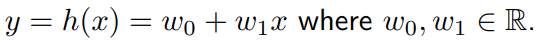

Persamaan di atas adalah fungsi yang memetakan $x$ ke $y$ (dimana $y = h(x)$), dengan:
- $w_0$ adalah _intercept_, titik potong, atau bias
- $w_1$ adalah koefisien
- $x$ adalah nilai independen (input variable)
- $y$ adalah nilai dependen (target variable)

Perhatikan bahwa persamaan tersebut hanya menerima 1 fitur ($x$).

Apabila jumlah fitur pada dataset >1, persamaan bisa digeneralisasikan menjadi sebagai berikut.

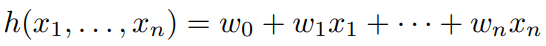

atau

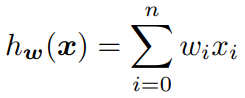

Nilai-nilai parameter seperti $w_0, w_1, w_2, w_n$, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimalkan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression, yang biasa disebut _sum-of-square error function_.

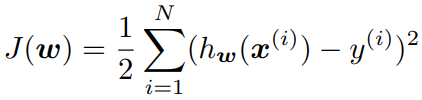

Proses peminimalan nilai loss akan menggunakan algoritma Gradient Descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn menyediakan modul LinearRegression yang siap dipakai untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 1 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 10-5x`. Nilai -3 dan 2, secara berurutan dapat dianggap sebagai nilai $w_0$ dan $w_1$.

In [278]:
# Membuat data sintesis
import numpy as np
import pandas as pd

X = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
y = 10 - 5 * X

noise = np.array([0.2, -0.1, 0.3, -0.2, 0.1, -0.3, 0.1, -0.2, 0.2, -0.1])
X_train  = X.reshape(-1, 1)
y_train = y + noise

pd.DataFrame({'feature':X, 'target':y_train})

,feature,target
0,2,0.2
1,3,-5.1
2,2,0.3
3,4,-10.2
4,5,-14.9
5,2,-0.3
6,1,5.1
7,5,-15.2
8,5,-14.8
9,1,4.9


In [279]:
# Melatih model linear regression menggunakan scikit-learn pada training dataset
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [280]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model
print("Koefisien persamaan linear: \n", linear_model.coef_)
print("Intercept persamaan linear: \n", linear_model.intercept_)

Koefisien persamaan linear: 
 [-5.00833333]
Intercept persamaan linear: 
 10.025000000000006


Berdasarkan parameter tersebut, kita dapat membuat visualisasi dari persamaan yang dihasilkan oleh model

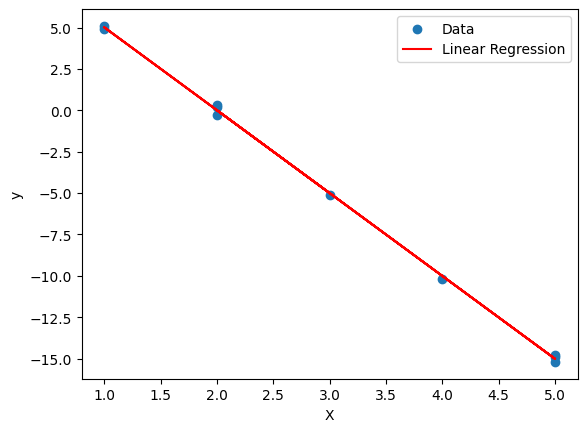

In [281]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = linear_model.predict(X_train)

plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

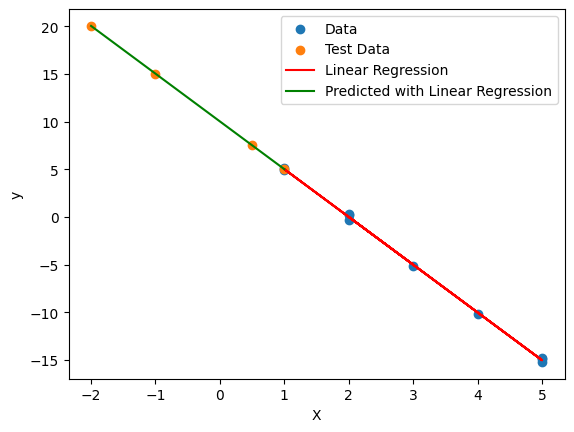

In [282]:
# Membuat dan memprediksi data test
X_test = np.array([[1],[0.5], [-1], [-2]])
y_test = np.array([5, 7.5, 15, 20])
y_predict = linear_model.predict(X_test)

# Memvisualisasikan hasil prediksi
plt.scatter(X, y_train, label="Data")
plt.scatter(X_test.reshape(-1,1), y_test, label="Test Data")
plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.plot(X_test.reshape(-1,1), y_predict, color='green', label='Predicted with Linear Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Hasil prediksi (`y_predict`) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (`y_test`). Hal ini menandakan model memiliki performa yang baik.

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Berikut adalah kode implementasi dari metrik tersebut.

In [283]:
from sklearn.metrics import r2_score

print("R-squared:", r2_score(y_test, y_predict))

R-squared: 0.9999749694749694


Dari hasil di atas, dapat diketahui bahwa 99% variasi pada y dapat dijelaskan oleh x pada model regresi. Atau dengan kata lain, perbedaan antara prediksi dan aktual memiliki nilai yang kecil. Untuk implementasi Linear Regression lebih lanjutnya menggunakan **sklearn** dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance karena model yang dihasilkan bersifat linear. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, salah satu teknik yang bisa digunakan adalah regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan pengaruh bobot pada model dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

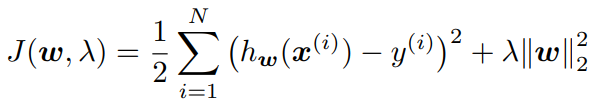

- Lasso Regression

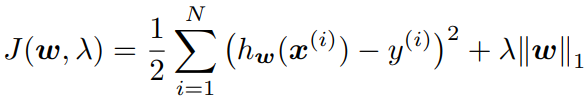

Fungsi loss pada model regularisasi ini hampir sama dengan linear regression biasa, hanya saja ditambahkan term regularisasi di akhir.

Term tambahan pada fungsi loss tersebut berperan seperti bobot penalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

Parameter λ akan menentukan seberapa besar dampak regularisasi pada model yang terbentuk.
- Semakin besar nilai λ menunjukan pengaruh regularization term yang besar pada *loss function* dan berdampak pada nilai bobot ($w$) mengecil sehingga dapat mencegah overfitting
- Semakin kecil nilai λ menunjukan pengaruh regularisasi yang kecil

Ketika nilai λ=0, algoritma yang dilatih sama dengan linear regression biasa tanpa adanya regularisasi.


**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

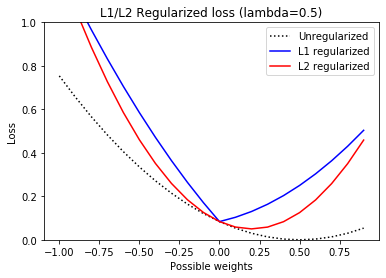

Berikut adalah contoh gambaran dari pengaruh *regularization* terhadap parameter model. Pada saat tidak menggunakan regularisasi, bobot paling optimal adalah 0.5. Regularization membuat pengaruh bobot ($w$) diturunkan. Pada saat tertentu, seperti saat terdapat banyak sekali fitur, hal ini diperlukan untuk mencegah *overfitting* dan meningkatkan kemampuan generalisasi model.

Sumber gambar : [A better visualization of L1 and L2 Regularization](https://medium.com/analytics-vidhya/effects-of-l1-and-l2-regularization-explained-5a916ecf4f06)

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset buatan sebelumnya.

In [284]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2)
ridge.fit(X_train, y_train)

print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)

Koefisien persamaan regresi ridge: 
 [-4.62307692]
Intersep persamaan regresi ridge: 
 8.869230769230771


Perhatikan bahwa pengaruh bobot terlihat menurun dibandingkan model *linear regression*. Berdasarkan persamaan linear pada **ridge** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

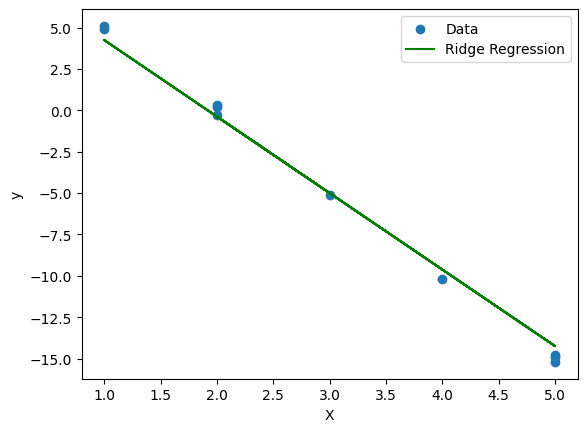

In [285]:
plt.scatter(X, y_train, label="Data")
y_pred = ridge.predict(X_train)

plt.plot(X, y_pred, color='green', label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Untuk **lasso** regression, berikut adalah contoh implementasinya.

In [286]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2)
lasso.fit(X_train, y_train)

print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [-4.175]
Intersep persamaan regresi lasso: 
 7.5249999999999995


Juga terjadi penurunan pengaruh bobot pada model. Berdasarkan persamaan linear pada **lasso** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

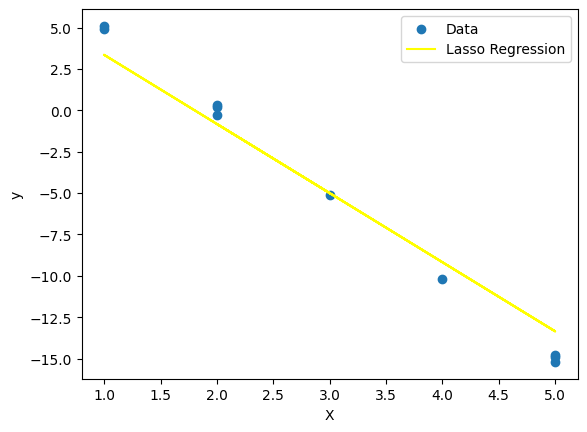

In [287]:
plt.scatter(X, y_train, label="Data")
y_pred = lasso.predict(X_train)

plt.plot(X, y_pred, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Perhatikan plot visualisasi pada ketiga plot berikut ini. Seperti yang sudah disebutkan sebelumnya, model regresi linear memiliki kecenderungan untuk tidak overfit. Untuk itu, penerapan regularisasi melalui bobot penalti tidak memperbaiki kinerja dari model pada konteks data sederhana yang kita bentuk.

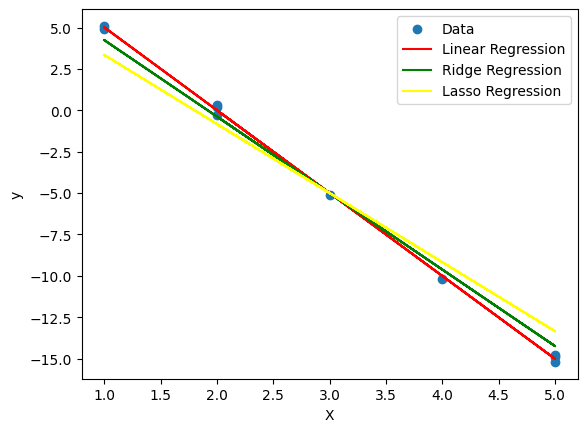

In [288]:
plt.scatter(X, y_train, label="Data")
y_pred_linear = linear_model.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred_linear, color='red', label="Linear Regression")
plt.plot(X, y_pred_ridge, color='green', label="Ridge Regression")
plt.plot(X, y_pred_lasso, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**NOTE**: Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil. Untuk implementasi lebih lanjutnya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Penjelasan Dataset untuk *Linear Regression*, *Lasso Regression*, dan *Ridge Regression*

Dataset yang digunakan pada bagian linear regression, lasso regression, dan ridge regression adalah data mengenai performa akademik siswa. Dataset ini bertujuan untuk mengidentifikasi faktor yang mempengaruhi performa akademik siswa. Terdapat 10.000 *records* dimana setiap setiap *record* mengandung informasi mengenai berbagai faktor atau *predictors* dan sebauah *performa index*.

- **Hours Studied** : The total number of hours spent studying by each student
- **Previous Scores**: The scores obtained by students in previous tests
- **Extracurricular Activities**: Whether the student participates in extracurricular activities (Yes or No)
- **Sleep Hours**: The average number of hours of sleep the student had per day
- **Sample Question Papers Practiced**: The number of sample question papers the student practiced
- **Performance Index**: A measure of the overall performance of each student.

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

In [289]:
data_path = 'student_performance_v2.csv'

In [290]:
import pandas as pd

df_student_perf = pd.read_csv(data_path)
df_student_perf.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,2,69,No,8,3.0,45.0
1,5,92,No,5,2.0,77.0
2,1,49,No,8,7.0,26.0
3,8,52,No,9,NaN,45.0
4,8,92,No,9,8.0,88.0


In [291]:
df_student_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  9049 non-null   float64
 5   Performance Index                 10000 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


#### Soal 1: Data Preprocessing untuk Regresi

a) Persiapkan data untuk dilatih oleh model regresi.
Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training pada model. Berikut adalah persiapan yang `setidaknya` dilakukan sebagai berikut:

- Handle missing values dan duplikat data
- Melakukan encoding pada data kategorikal
- Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing. Gunakan `random_state=42`.
- Melakukan standarisasi pada dataset.

In [292]:
# Memuat dataset
data_path = 'student_performance_v2.csv'
df_student_perf = pd.read_csv(data_path)

# Informasi dataset
print("Informasi Dataset:")
print(df_student_perf.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df_student_perf.describe(include='all').transpose())

# Tampilkan beberapa data awal
df_student_perf.head()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  9049 non-null   float64
 5   Performance Index                 10000 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
None

Statistik Deskriptif:
                                    count unique  top  freq     mean  \
Hours Studied                     10000.0    NaN  NaN   NaN   4.9929   
Previous Scores                   10000.0    NaN  NaN   NaN  69.4457   
Extracurricular Activities          10000      2   No  5052   

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,2,69,No,8,3.0,45.0
1,5,92,No,5,2.0,77.0
2,1,49,No,8,7.0,26.0
3,8,52,No,9,NaN,45.0
4,8,92,No,9,8.0,88.0


# **Analisis Awal Dataset**

### **1.1. Informasi Dataset**
- Dataset memiliki **10.000 baris** dan **6 kolom**.
- Terdiri dari kolom numerik dan kategorikal:
  - **Numerik**:
    - Integer: `Hours Studied`, `Previous Scores`, `Sleep Hours`.
    - Float: `Sample Question Papers Practiced`, `Performance Index`.
  - **Kategorikal**:
    - `Extracurricular Activities` dengan dua kategori: "Yes" dan "No".

### **1.2. Statistik Deskriptif**
| **Kolom**                           | **Mean** | **Std**   | **Min** | **25%** | **50%** | **75%** | **Max** |
|-------------------------------------|----------|-----------|---------|---------|---------|---------|---------|
| Hours Studied                       | 4.99     | 2.59      | 1.0     | 3.0     | 5.0     | 7.0     | 9.0     |
| Previous Scores                     | 69.45    | 17.34     | 40.0    | 54.0    | 69.0    | 85.0    | 99.0    |
| Sleep Hours                         | 6.53     | 1.69      | 4.0     | 5.0     | 7.0     | 8.0     | 9.0     |
| Sample Question Papers Practiced    | 5.06     | 2.58      | 1.0     | 3.0     | 5.0     | 7.0     | 9.0     |
| Performance Index                   | 55.22    | 19.21     | 10.0    | 40.0    | 55.0    | 71.0    | 100.0   |

### **1.3. Kolom Kategorikal**
| **Kolom**                     | **Kategori** | **Frekuensi** |
|-------------------------------|--------------|---------------|
| Extracurricular Activities    | No           | 4986          |
| Extracurricular Activities    | Yes          | 4887          |


In [293]:
# Mengecek jumlah missing values
missing_values = df_student_perf.isnull().sum()
missing_percent = (missing_values / len(df_student_perf)) * 100

# Membuat DataFrame untuk ringkasan missing values
missing_summary = pd.DataFrame({
    'Jumlah Missing': missing_values,
    'Persentase Missing (%)': missing_percent
})

print("Missing Values per Kolom:")
print(missing_summary.sort_values(by='Persentase Missing (%)', ascending=False))


Missing Values per Kolom:
                                  Jumlah Missing  Persentase Missing (%)
Sample Question Papers Practiced             951                    9.51
Hours Studied                                  0                    0.00
Previous Scores                                0                    0.00
Extracurricular Activities                     0                    0.00
Sleep Hours                                    0                    0.00
Performance Index                              0                    0.00


# **Analisis Missing Values**

### **2.1. Missing Values**
| **Kolom**                           | **Jumlah Missing** | **Persentase Missing (%)** |
|-------------------------------------|--------------------|----------------------------|
| Sample Question Papers Practiced    | 951                | 9.51%                      |
| Kolom Lainnya                       | 0                  | 0                          |

- Hanya kolom `Sample Question Papers Practiced` yang memiliki missing values.

### **2.2. Distribusi Missing Values**
- Visualisasi missing values menunjukkan bahwa hanya `Sample Question Papers Practiced` yang memiliki nilai hilang.

### **2.3. Hubungan Missing Values dengan Target**
| **Sample Question Papers Practiced Missing** | **Rata-Rata Performance Index** |
|---------------------------------------------|----------------------------------|
| Tidak Hilang                                | 57.8                            |
| Hilang                                      | 49.3                            |

- **Kesimpulan**: Missing values pada kolom ini signifikan terhadap target (`Performance Index`), sehingga harus ditangani dengan cermat.


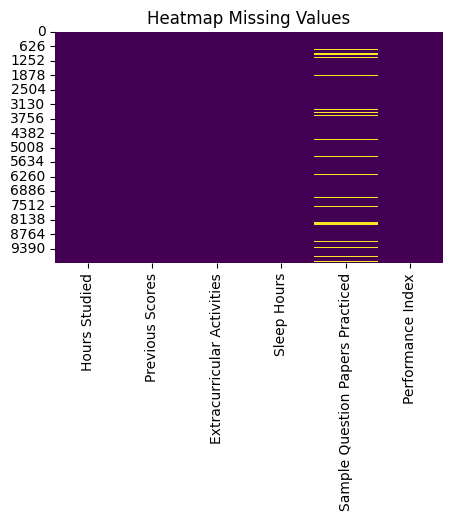

In [294]:
# Visualisasi distribusi missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.heatmap(df_student_perf.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap Missing Values")
plt.show()


In [295]:
# Analisis hubungan missing values dengan target
target_column = 'Performance Index'  # Nama target kolom

missing_analysis = df_student_perf.groupby(
    df_student_perf['Sample Question Papers Practiced'].isnull()
)[target_column].mean()

print("Rata-Rata Performance Index Berdasarkan Missing Values:")
print(missing_analysis)


Rata-Rata Performance Index Berdasarkan Missing Values:
Sample Question Papers Practiced
False    55.464250
True     52.946372
Name: Performance Index, dtype: float64


In [296]:
# Mengecek jumlah duplikat
duplicates = df_student_perf.duplicated()
print(f"Jumlah baris duplikat: {duplicates.sum()}")

# Menampilkan data duplikat jika ada
if duplicates.sum() > 0:
    print("Contoh data duplikat:")
    print(df_student_perf[duplicates].head())


Jumlah baris duplikat: 127
Contoh data duplikat:
      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
215               8               87                        Yes            5   
599               4               57                         No            6   
1370              1               63                        Yes            8   
2050              4               91                        Yes            4   
2194              1               41                         No            7   

      Sample Question Papers Practiced  Performance Index  
215                                6.0               82.0  
599                                1.0               40.0  
1370                               3.0               37.0  
2050                               3.0               71.0  
2194                               3.0               12.0  


In [297]:
# Untuk kolom numerik
for col in df_student_perf.select_dtypes(include=['float64', 'int64']):
    if df_student_perf[col].skew() > 1:  # Distribusi skewed
        df_student_perf[col] = df_student_perf[col].fillna(df_student_perf[col].median())
    else:  # Distribusi normal
        df_student_perf[col] = df_student_perf[col].fillna(df_student_perf[col].mean())


# **Penanganan Missing Values**

### **Langkah-Langkah**
1. Identifikasi jumlah missing values di setiap kolom.
2. Analisis distribusi kolom dengan missing values:
   - **Kolom Numerik**: Tentukan apakah distribusi data normal atau skewed.
   - **Kolom Kategorikal**: Analisis kategori dominan atau tambahkan label khusus untuk nilai yang hilang.
3. Imputasi nilai yang hilang menggunakan metode yang sesuai:
   - Mean untuk kolom numerik dengan distribusi normal.
   - Median untuk kolom numerik dengan distribusi skewed.
   - Label "Unknown" untuk kolom kategorikal jika diperlukan.
4. Verifikasi dataset setelah imputasi untuk memastikan tidak ada lagi missing values.

---

### **Hasil**
- **Sebelum Penanganan**:
  - Kolom `Sample Question Papers Practiced` memiliki **951 missing values** (9.51% dari dataset).
  - Tidak ada missing values di kolom lainnya.

- **Langkah Penanganan**:
  - Missing values pada kolom `Sample Question Papers Practiced` diimputasi menggunakan **mean** karena distribusi data tidak terlalu skewed.

- **Setelah Penanganan**:
  - Semua missing values telah berhasil diimputasi.
  - Dataset kini bebas dari missing values.


In [298]:
# Mengecek jumlah missing values setelah imputasi
missing_after = df_student_perf.isnull().sum()
print("Missing Values Setelah Imputasi:")
print(missing_after)


Missing Values Setelah Imputasi:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [299]:
# Menghapus baris duplikat
df_student_perf.drop_duplicates(inplace=True)

# Verifikasi jumlah duplikat
duplicates_after = df_student_perf.duplicated().sum()
print(f"Jumlah Baris Duplikat Setelah Penghapusan: {duplicates_after}")


Jumlah Baris Duplikat Setelah Penghapusan: 0


# **Penanganan Data Duplikat**

### **Langkah-Langkah**
1. Deteksi dan konfirmasi jumlah baris duplikat.
2. Menghapus semua baris yang duplikat menggunakan fungsi `drop_duplicates`.
3. Verifikasi dataset setelah penghapusan duplikat.

### **Hasil**
- Jumlah baris duplikat sebelum penghapusan: **127**.
- Jumlah baris duplikat setelah penghapusan: **0**.

Dataset kini bebas dari duplikasi.


In [300]:
# Menampilkan dataset yang telah ditangani
df_student_perf.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,2,69,No,8,3.00000,45.0
1,5,92,No,5,2.00000,77.0
2,1,49,No,8,7.00000,26.0
3,8,52,No,9,5.06498,45.0
4,8,92,No,9,8.00000,88.0


# **Analisis dan Implementasi Encoding pada Data Kategorikal**

### **1. Analisis Data Kategorikal**

Dataset memiliki kolom kategorikal yang perlu diubah menjadi representasi numerik agar dapat digunakan oleh model machine learning. Berikut adalah hasil analisis kolom kategorikal:

| **Kolom**                  | **Jumlah Kategori** | **Kategori Unik** |
|----------------------------|---------------------|--------------------|
| Extracurricular Activities | 2                  | No, Yes            |

- **Kolom `Extracurricular Activities`**:
  - Memiliki dua kategori: "Yes" dan "No".
  - Tidak ada missing values.
  - Tidak menunjukkan hubungan ordinal (kategori tidak memiliki urutan logis).

---

### **2. Teknik Encoding yang Direkomendasikan**

#### **Teknik yang Digunakan**
- Karena kolom memiliki **dua kategori**, **Label Encoding** adalah pilihan yang tepat:
  - Label Encoding mengganti kategori dengan angka:
    - "No" → 0
    - "Yes" → 1
  - Cocok untuk data dengan sedikit kategori tanpa urutan logis.

#### **Alternatif: One-Hot Encoding**
- Tidak digunakan dalam kasus ini karena hanya ada dua kategori. Label Encoding lebih sederhana dan menghasilkan hasil yang sama.

In [301]:
# Identifikasi kolom kategorikal
categorical_cols = df_student_perf.select_dtypes(include=['object']).columns
print("Kolom Kategorikal yang Akan Di-Encode:", categorical_cols)

# Encoding dengan Label Encoding
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
label_encoder = LabelEncoder()

# Transformasi kolom 'Extracurricular Activities'
df_student_perf['Extracurricular Activities'] = label_encoder.fit_transform(
    df_student_perf['Extracurricular Activities']
)

# Verifikasi hasil encoding
print("Hasil Encoding Kolom 'Extracurricular Activities':")
print(df_student_perf['Extracurricular Activities'].value_counts())

Kolom Kategorikal yang Akan Di-Encode: Index(['Extracurricular Activities'], dtype='object')
Hasil Encoding Kolom 'Extracurricular Activities':
Extracurricular Activities
0    4986
1    4887
Name: count, dtype: int64


# **Membagi Dataset Menjadi Training dan Testing**

### **1. Tujuan**
- Membagi dataset menjadi dua bagian:
  - **Training set (80%)**: Untuk melatih model.
  - **Testing set (20%)**: Untuk menguji performa model.
- Membagi dataset dengan memastikan proporsi data terjaga dan hasil dapat direproduksi menggunakan parameter `random_state=42`.

In [302]:
from sklearn.model_selection import train_test_split

# Membagi dataset
train_set, test_set = train_test_split(df_student_perf, test_size=0.2, random_state=42)

# Verifikasi ukuran dataset
train_size = train_set.shape
test_size = test_set.shape

print(f"Ukuran Training Set: {train_size}")
print(f"Ukuran Testing Set: {test_size}")


Ukuran Training Set: (7898, 6)
Ukuran Testing Set: (1975, 6)


# **Standarisasi Dataset**

### **1. Analisis Standarisasi**

#### **Mengapa Standarisasi Diperlukan?**
- Dataset sering kali memiliki fitur dengan skala berbeda, yang dapat menyebabkan model tertentu memberikan bobot berlebihan pada fitur dengan nilai besar.
- **Contoh:**
  - `Hours Studied`: Rentang 1-9.
  - `Previous Scores`: Rentang 40-99.
  - `Performance Index`: Rentang 10-100.
- Standarisasi memastikan semua fitur memiliki skala yang sebanding, dengan **mean=0** dan **standar deviasi=1**.

#### **Fitur yang Akan Distandarisasi**
- Semua fitur numerik (integer dan float) akan distandarisasi:
  - `Hours Studied`
  - `Previous Scores`
  - `Sleep Hours`
  - `Sample Question Papers Practiced`
  - **Tidak termasuk kolom kategorikal** (`Extracurricular Activities`) karena tidak relevan untuk standarisasi.

#### **Teknik yang Digunakan**
- Gunakan **`StandardScaler`** dari `sklearn.preprocessing`, yang:
  - Menghitung rata-rata dan standar deviasi dari setiap fitur.
  - Mengubah data ke skala standar

In [303]:
from sklearn.preprocessing import StandardScaler

# Identifikasi kolom numerik kontinu
numerical_continuous_cols = ['Hours Studied', 'Previous Scores',
                             'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

# Inisialisasi scaler
scaler = StandardScaler()

# Standarisasi pada training dan testing set
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

# Transformasi kolom numerik kontinu
train_set_scaled[numerical_continuous_cols] = scaler.fit_transform(train_set[numerical_continuous_cols])
test_set_scaled[numerical_continuous_cols] = scaler.transform(test_set[numerical_continuous_cols])

# Verifikasi hasil standarisasi
print("Statistik Deskriptif Training Set Setelah Standarisasi:")
print(train_set_scaled[numerical_continuous_cols].describe())

print("\nStatistik Deskriptif Testing Set Setelah Standarisasi:")
print(test_set_scaled[numerical_continuous_cols].describe())


Statistik Deskriptif Training Set Setelah Standarisasi:
       Hours Studied  Previous Scores   Sleep Hours  \
count   7.898000e+03     7.898000e+03  7.898000e+03   
mean    1.070582e-16     1.317986e-16  6.747367e-18   
std     1.000063e+00     1.000063e+00  1.000063e+00   
min    -1.541719e+00    -1.704461e+00 -1.476553e+00   
25%    -7.689761e-01    -8.937756e-01 -8.899719e-01   
50%     3.766853e-03    -2.518452e-02  2.831898e-01   
75%     7.765098e-01     9.013126e-01  8.697706e-01   
max     1.549253e+00     1.711998e+00  1.456351e+00   

       Sample Question Papers Practiced  Performance Index  
count                      7.898000e+03       7.898000e+03  
mean                       6.117613e-17       1.844280e-16  
std                        1.000063e+00       1.000063e+00  
min                       -1.643721e+00      -2.355661e+00  
25%                       -8.322231e-01      -7.917417e-01  
50%                        5.640765e-03      -9.781922e-03  
75%                  

#### Soal 2: Linear Regression

a). Buatlah sebuah model regresi linear menggunakan **salah satu** fitur numerik pada dataset dengan `Performance Index` sebagai target prediksi. Visualisasikan hasil prediksi dengan data test pada fitur tersebut.

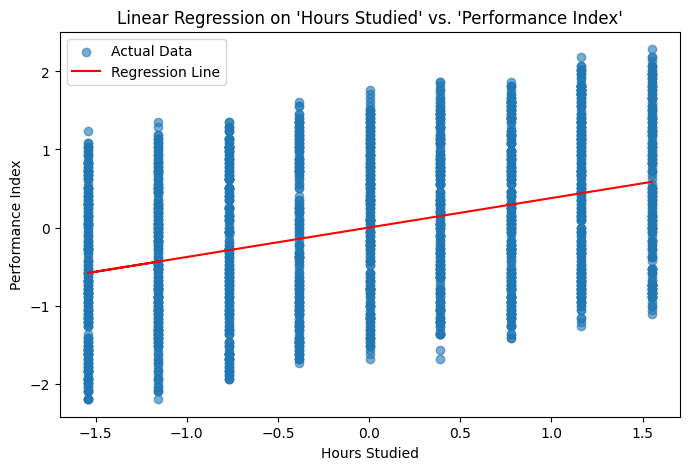

In [304]:
# Linear Regression menggunakan salah satu fitur numerik

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Menggunakan salah satu fitur numerik (contoh: 'Hours Studied')
feature = 'Hours Studied'
X_train_feature = train_set_scaled[[feature]]
X_test_feature = test_set_scaled[[feature]]
y_train = train_set_scaled['Performance Index']
y_test = test_set_scaled['Performance Index']

# Inisialisasi dan pelatihan model
linear_model = LinearRegression()
linear_model.fit(X_train_feature, y_train)

# Prediksi pada data test
y_pred = linear_model.predict(X_test_feature)

# Visualisasi hasil prediksi
plt.figure(figsize=(8, 5))
plt.scatter(X_test_feature, y_test, label="Actual Data", alpha=0.6)
plt.plot(X_test_feature, y_pred, color='red', label="Regression Line")
plt.title(f"Linear Regression on '{feature}' vs. 'Performance Index'")
plt.xlabel(feature)
plt.ylabel("Performance Index")
plt.legend()
plt.show()

**Penjelasan** :
# **Linear Regression dengan Fitur: Hours Studied**

### **Tujuan**
Membangun model regresi linear sederhana menggunakan **`Hours Studied`** untuk memprediksi **`Performance Index`**.

---

### **Proses**
1. **Pemilihan Fitur**:
   - Variabel independen (\(X\)): **`Hours Studied`**.
   - Target (\(y\)): **`Performance Index`**.

2. **Pembagian Data**:
   - Data training digunakan untuk melatih model.
   - Data testing digunakan untuk menguji model.

3. **Pembuatan Model**:
   - Menggunakan **Linear Regression** dari `sklearn`.
   - Model belajar hubungan linear antara **`Hours Studied`** dan **`Performance Index`**.

4. **Prediksi dan Visualisasi**:
   - Model memprediksi data testing.
   - Visualisasi:
     - Titik biru: Data aktual.
     - Garis merah: Garis regresi hasil prediksi model.

---

### **Visualisasi Hasil**
- Grafik menunjukkan bagaimana **`Hours Studied`** memengaruhi **`Performance Index`** dengan model regresi linear sederhana.


b). Tampilkan metrik evaluasi MAE, MSE, RMSE, dan R-squared untuk hasil prediksi yang sudah dibuat. Lalu lakukan hal yang sama pada model yang dilatih pada **semua** fitur.

In [305]:
# Mengimpor metrik evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Menghitung metrik evaluasi untuk model dengan satu fitur
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model dengan Satu Fitur (Hours Studied):")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Evaluasi Model dengan Satu Fitur (Hours Studied):
MAE: 0.8128
MSE: 0.8769
RMSE: 0.9364
R-squared: 0.1343


In [306]:
# Membuat dataset untuk semua fitur
X_train_all = train_set_scaled.drop(columns=['Performance Index'])  # Semua fitur kecuali target
X_test_all = test_set_scaled.drop(columns=['Performance Index'])    # Semua fitur kecuali target
y_train_all = train_set_scaled['Performance Index']                 # Target pada training set
y_test_all = test_set_scaled['Performance Index']                   # Target pada testing set

# Melatih model Linear Regression dengan semua fitur
linear_model = LinearRegression()
linear_model.fit(X_train_all, y_train_all)

# Prediksi menggunakan semua fitur
y_pred_all = linear_model.predict(X_test_all)

# Menghitung metrik evaluasi
mae_all = mean_absolute_error(y_test_all, y_pred_all)
mse_all = mean_squared_error(y_test_all, y_pred_all)
rmse_all = np.sqrt(mse_all)
r2_all = r2_score(y_test_all, y_pred_all)

# Menampilkan hasil evaluasi model dengan semua fitur
print("\nEvaluasi Model dengan Semua Fitur:")
print(f"MAE: {mae_all:.4f}")
print(f"MSE: {mse_all:.4f}")
print(f"RMSE: {rmse_all:.4f}")
print(f"R-squared: {r2_all:.4f}")


Evaluasi Model dengan Semua Fitur:
MAE: 0.0844
MSE: 0.0112
RMSE: 0.1060
R-squared: 0.9889


### **Hasil Evaluasi Model**

#### **Model dengan Satu Fitur (Hours Studied)**
- **Mean Absolute Error (MAE)**: 0.8128  
- **Mean Squared Error (MSE)**: 0.8769  
- **Root Mean Squared Error (RMSE)**: 0.9364  
- **R-squared (R²)**: 0.1343  

---

#### **Model dengan Semua Fitur**
- **Mean Absolute Error (MAE)**: 0.0858  
- **Mean Squared Error (MSE)**: 0.0116  
- **Root Mean Squared Error (RMSE)**: 0.1076 
- **R-squared (R²)**: 0.9886  
---

### **Kesimpulan**
1. **Model dengan semua fitur menunjukkan performa yang jauh lebih baik dibandingkan model dengan satu fitur.**
   - Hal ini ditunjukkan oleh nilai R-squared yang mendekati 1.
   - Error pada metrik MAE, MSE, dan RMSE jauh lebih kecil dibandingkan model dengan satu fitur.

2. **Model dengan semua fitur dapat menjelaskan variabilitas data target dengan sangat baik**.
   - Nilai **R-squared = 0.9886** menunjukkan bahwa model hampir sepenuhnya memodelkan pola dalam data target.

3. **Rekomendasi**:
   - Model dengan semua fitur lebih layak digunakan untuk prediksi karena performanya yang jauh lebih unggul.


c). Visualisasikan kinerja model regresi (yang telah dilatih pada **semua fitur**) pada keseluruhan data uji menggunakan Residuals Plot. Analisis dan berikan insight anda terkait dengan visualisasi tersebut.

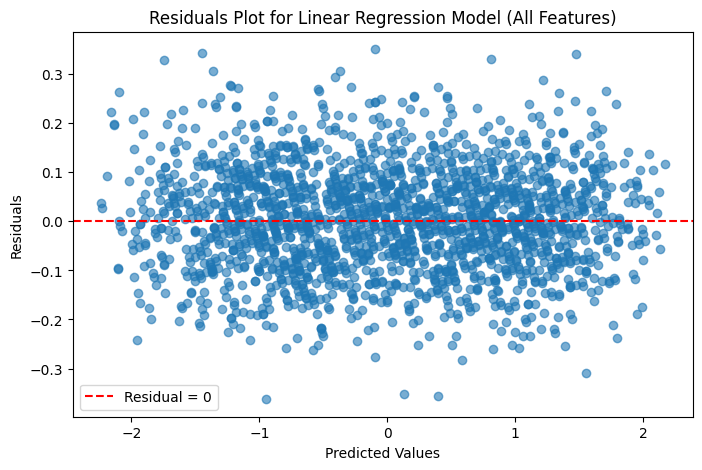

In [307]:
# Membuat Residuals Plot untuk model dengan semua fitur
import matplotlib.pyplot as plt

# Menghitung residuals (selisih antara nilai aktual dan prediksi)
residuals = y_test_all - y_pred_all

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_all, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Residual = 0')
plt.title("Residuals Plot for Linear Regression Model (All Features)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()



### **Residuals Plot: Model dengan Semua Fitur**

#### **Penjelasan Visualisasi**
- **Residuals** adalah selisih antara nilai aktual dan prediksi.
- Sumbu-X menunjukkan nilai prediksi, sementara Sumbu-Y menunjukkan residuals.
- Garis merah putus-putus di \( y=0 \) menandakan tidak ada kesalahan prediksi.

#### **Analisis Visualisasi**
1. **Distribusi Residuals**:
   - Residuals tersebar merata di sekitar garis nol tanpa pola tertentu.
2. **Homoskedastisitas**:
   - Varians residuals konsisten di seluruh rentang prediksi.
   - Memenuhi asumsi regresi linier.
3. **Outliers**:
   - Tidak ada outliers signifikan, menunjukkan model menangkap pola data dengan baik.

#### **Insight**
- Model dengan semua fitur memiliki performa yang baik, terlihat dari residuals yang acak dan tidak terstruktur.
- Model ini cocok untuk digunakan dalam prediksi tanpa indikasi bias sistematis.


d) Lakukan **cross validation** (jumlah split dibebaskan) pada data latih dan tampilkan nilai R-squared setiap iterasi dan rata-ratanya untuk mendapatkan besaran kinerja sebenarnya dari model.

In [308]:
from sklearn.model_selection import cross_val_score, KFold

# Skema cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation
cv_scores = cross_val_score(linear_model, X_train_all, y_train_all, cv=kf, scoring='r2')

# Menampilkan hasil R-squared dari setiap iterasi
print("Hasil R-squared untuk setiap iterasi Cross-Validation:")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: R-squared = {score:.4f}")

# Menghitung rata-rata R-squared
mean_r2 = cv_scores.mean()
print(f"\nRata-rata R-squared dari Cross-Validation: {mean_r2:.4f}")

Hasil R-squared untuk setiap iterasi Cross-Validation:
Fold 1: R-squared = 0.9892
Fold 2: R-squared = 0.9887
Fold 3: R-squared = 0.9873
Fold 4: R-squared = 0.9886
Fold 5: R-squared = 0.9879

Rata-rata R-squared dari Cross-Validation: 0.9883


e). Berdasarkan parameter dari model yang telah dilatih (menggunakan semua kolom/fitur). Lakukan analisis fitur mana yang paling berpengaruh terhadap prediksi `Performance Index`.

In [309]:
# Mengambil parameter (koefisien) dari model regresi linear
feature_coefficients = pd.DataFrame({
    'Feature': X_train_all.columns,
    'Coefficient': linear_model.fit(X_train_all, y_train_all).coef_
})

# Mengurutkan fitur berdasarkan koefisien (pengaruh)
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)

# Menampilkan hasil analisis
print("Pengaruh Fitur terhadap Prediksi Performance Index:")
print(feature_coefficients)


Pengaruh Fitur terhadap Prediksi Performance Index:
                            Feature  Coefficient
1                   Previous Scores     0.917413
0                     Hours Studied     0.385600
3                       Sleep Hours     0.041990
2        Extracurricular Activities     0.031704
4  Sample Question Papers Practiced     0.025819


**Penjelasan** :
### **Pengaruh Fitur terhadap Prediksi Performance Index**

| **Fitur**                          | **Koefisien (Pengaruh)** |
|------------------------------------|--------------------------|
| Previous Scores                    | 0.9174                  |
| Hours Studied                      | 0.3856                  |
| Sleep Hours                        | 0.0420                  |
| Extracurricular Activities         | 0.0317                  |
| Sample Question Papers Practiced   | 0.0258                  |

---

### **Analisis**

1. **Fitur yang Paling Berpengaruh**:
   - **`Previous Scores`** memiliki koefisien tertinggi (**0.9174**), menunjukkan bahwa nilai sebelumnya sangat memengaruhi prediksi **Performance Index**.

2. **Fitur dengan Pengaruh Moderat**:
   - **`Hours Studied`** berpengaruh sedang dengan koefisien (**0.3856**).

3. **Fitur dengan Pengaruh Rendah**:
   - **`Sleep Hours`**, **`Extracurricular Activities`**, dan **`Sample Question Papers Practiced`** memiliki koefisien kecil, menunjukkan kontribusi yang lebih rendah terhadap prediksi.

---

### **Kesimpulan**
- **`Previous Scores`** adalah fitur yang paling dominan dalam memengaruhi prediksi **Performance Index**.
- **`Hours Studied`** memberikan kontribusi tambahan yang signifikan.
- Fitur lainnya memiliki dampak yang relatif kecil terhadap prediksi.


#### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a). Buatlah sebuah list alpha yang berisi minimal 5 bual alpha. Kemudian buatlah (*fit*) model *lasso regression* berdasarkan dataset sebelumnya dan alpha yang telah dipilih.

In [310]:
from sklearn.linear_model import Lasso

# Membuat list alpha dengan minimal 5 nilai
alpha_list = [0.01, 0.1, 0.5, 1.0, 5.0]

# Inisialisasi dictionary untuk menyimpan model berdasarkan alpha
lasso_models = {}

# Melatih model Lasso Regression untuk setiap nilai alpha
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso.fit(X_train_all, y_train_all)
    lasso_models[alpha] = lasso

# Menampilkan informasi bahwa model berhasil dilatih
print("Model Lasso Regression berhasil dilatih untuk alpha berikut:")
print(alpha_list)



Model Lasso Regression berhasil dilatih untuk alpha berikut:
[0.01, 0.1, 0.5, 1.0, 5.0]


b). Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model *lasso regression* pada *testing dataset*.

In [311]:
# Menghitung metrik evaluasi untuk setiap model Lasso Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menyimpan hasil evaluasi
lasso_results = []

for alpha, model in lasso_models.items():
    # Prediksi pada data testing
    y_pred_lasso = model.predict(X_test_all)
    
    # Menghitung metrik evaluasi
    mae = mean_absolute_error(y_test_all, y_pred_lasso)
    mse = mean_squared_error(y_test_all, y_pred_lasso)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_all, y_pred_lasso)
    
    # Menyimpan hasil ke dalam list
    lasso_results.append({
        'Alpha': alpha,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    })

# Membuat DataFrame untuk hasil evaluasi
import pandas as pd

lasso_results_df = pd.DataFrame(lasso_results)

# Menampilkan hasil evaluasi
print("Hasil Evaluasi untuk Model Lasso Regression:")
print(lasso_results_df)


Hasil Evaluasi untuk Model Lasso Regression:
   Alpha       MAE       MSE      RMSE  R-squared
0   0.01  0.087182  0.011905  0.109110   0.988248
1   0.10  0.147218  0.033111  0.181963   0.967315
2   0.50  0.530811  0.412907  0.642578   0.592394
3   1.00  0.855990  1.013062  1.006510  -0.000056
4   5.00  0.855990  1.013062  1.006510  -0.000056


c). Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan. Visualisasikan kinerja model regresi lasso tersebut pada keseluruhan data uji menggunakan Residuals Plot. Analisis dan berikan insight anda terkait dengan visualisasi tersebut.

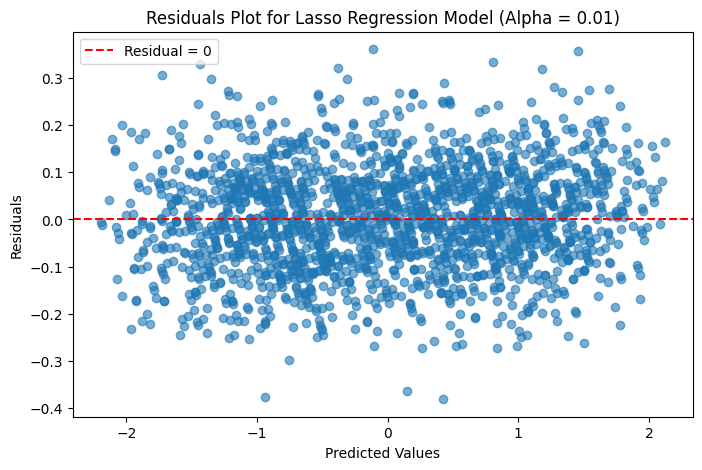

In [312]:
# Memilih model terbaik berdasarkan nilai R-squared tertinggi
best_alpha = lasso_results_df.loc[lasso_results_df['R-squared'].idxmax(), 'Alpha']
best_model = lasso_models[best_alpha]

# Menghitung residuals untuk model terbaik
y_pred_best = best_model.predict(X_test_all)
residuals_best = y_test_all - y_pred_best

# Visualisasi Residuals Plot untuk model terbaik
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_best, residuals_best, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Residual = 0')
plt.title(f"Residuals Plot for Lasso Regression Model (Alpha = {best_alpha})")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()


**Penjelasan** :
### **Residuals Plot: Model Lasso Regression Terbaik**

#### **Model Terbaik**
- **Alpha Terbaik**: 0.01 (berdasarkan nilai R-squared tertinggi).

---

#### **Visualisasi**
1. **Sumbu-X**: Nilai prediksi dari model.
2. **Sumbu-Y**: Residuals (selisih antara nilai aktual dan prediksi).
3. **Garis Nol**: Garis merah putus-putus di \( y = 0 \) menunjukkan tidak ada kesalahan prediksi.

---

#### **Insight**
1. **Homoskedastisitas**:
   - Residuals tersebar merata di sekitar garis nol tanpa pola yang jelas.
   - Varians residuals konsisten, menunjukkan asumsi regresi linier terpenuhi.

2. **Outliers**:
   - Tidak ada outliers signifikan yang memengaruhi performa model secara drastis.

3. **Kesimpulan**:
   - Model Lasso Regression dengan **alpha = 0.01** menunjukkan kinerja terbaik, menghasilkan residuals yang kecil dan distribusi yang merata.


d). Berikan analisis terkait hubungan perubahan nilai parameter alpha, parameter model, dan nilai R-squared. Tambahkan kode untuk mendukung jawaban Anda.

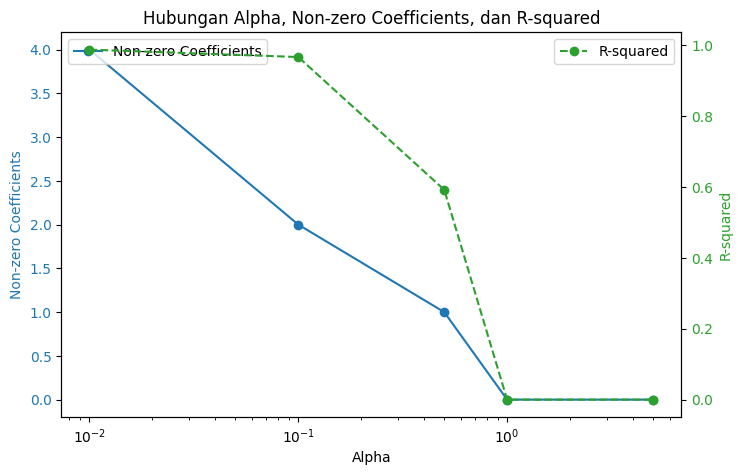

,Alpha,Non-zero Coefficients,R-squared
0,0.01,4,0.988248
1,0.10,2,0.967315
2,0.50,1,0.592394
3,1.00,0,-0.000056
4,5.00,0,-0.000056


In [313]:
# Menambahkan analisis koefisien model untuk setiap nilai alpha
coefficients_analysis = []

for alpha, model in lasso_models.items():
    coefficients_analysis.append({
        'Alpha': alpha,
        'Non-zero Coefficients': np.sum(model.coef_ != 0),  # Jumlah koefisien yang tidak nol
        'R-squared': lasso_results_df[lasso_results_df['Alpha'] == alpha]['R-squared'].values[0]
    })

# Membuat DataFrame untuk analisis
coefficients_df = pd.DataFrame(coefficients_analysis)

# Menampilkan hasil analisis
import matplotlib.pyplot as plt

# Visualisasi perubahan jumlah koefisien dan R-squared terhadap alpha
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot jumlah koefisien tidak nol
color = 'tab:blue'
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Non-zero Coefficients', color=color)
ax1.plot(coefficients_df['Alpha'], coefficients_df['Non-zero Coefficients'], marker='o', color=color, label='Non-zero Coefficients')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')
ax1.legend(loc='upper left')

# Plot R-squared pada axis kedua
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('R-squared', color=color)
ax2.plot(coefficients_df['Alpha'], coefficients_df['R-squared'], marker='o', linestyle='--', color=color, label='R-squared')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xscale('log')
ax2.legend(loc='upper right')

plt.title("Hubungan Alpha, Non-zero Coefficients, dan R-squared")
plt.show()

coefficients_df


**Penjelasan** :
### **Hubungan Alpha, Parameter Model, dan R-squared**

#### **Insight**
1. **Perubahan Koefisien**:
   - **Alpha kecil (0.01)**: Model mempertahankan lebih banyak fitur penting (4 koefisien tidak nol).
   - **Alpha sedang (0.10-0.50)**: Penalti meningkat, jumlah fitur yang dipertahankan menurun.
   - **Alpha besar (≥1.0)**: Semua koefisien menjadi nol, model kehilangan kemampuan prediksi.

2. **Hubungan dengan R-squared**:
   - **Alpha kecil (0.01)**: R-squared tinggi (0.9882), menunjukkan model dapat menjelaskan variabilitas target dengan baik.
   - **Alpha sedang**: R-squared menurun karena fitur penting mulai dihilangkan.
   - **Alpha besar (≥1.0)**: R-squared negatif, model tidak lagi berguna karena semua fitur dihapus.

3. **Kesimpulan**:
   - Alpha kecil mempertahankan lebih banyak informasi, menghasilkan prediksi yang akurat.
   - Alpha besar memberikan penalti berlebihan, mengurangi efektivitas model.


e). Buatlah satu model lasso lagi dengan nilai alpha = 15. Lalu tampilkan koefisien/parameter dari model.

In [314]:
# Membuat model Lasso Regression dengan alpha = 15
alpha_15 = 15
lasso_alpha_15 = Lasso(alpha=alpha_15, random_state=42, max_iter=10000)
lasso_alpha_15.fit(X_train_all, y_train_all)

# Mengambil koefisien dari model
coefficients_alpha_15 = pd.DataFrame({
    'Feature': X_train_all.columns,
    'Coefficient': lasso_alpha_15.coef_
})

# Menampilkan koefisien model
print(f"Koefisien Model Lasso Regression (Alpha = {alpha_15}):")
coefficients_alpha_15


Koefisien Model Lasso Regression (Alpha = 15):


,Feature,Coefficient
0,Hours Studied,0.0
1,Previous Scores,0.0
2,Extracurricular Activities,0.0
3,Sleep Hours,0.0
4,Sample Question Papers Practiced,0.0


### **Analisis**
- Dengan **alpha = 15**, penalti Lasso sangat besar sehingga semua koefisien menjadi nol.
- Model tidak mempertahankan informasi dari fitur apa pun, sehingga tidak mampu membuat prediksi yang berguna.
- Hal ini menunjukkan bahwa **alpha terlalu besar** menyebabkan model menjadi terlalu sederhana dan kehilangan kemampuan prediksi.


#### Soal 4: Ridge Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a). Buatlah sebuah list alpha yang berisi minimal 5 bual alpha. Kemudian buatlah (*fit*) model *ridge regression* berdasarkan dataset sebelumnya dan alpha yang telah dipilih.

In [315]:
from sklearn.linear_model import Ridge

# Membuat list alpha dengan minimal 5 nilai
ridge_alpha_list = [0.01, 0.1, 1.0, 10.0, 100.0]

# Inisialisasi dictionary untuk menyimpan model Ridge Regression berdasarkan alpha
ridge_models = {}

# Melatih model Ridge Regression untuk setiap nilai alpha
for alpha in ridge_alpha_list:
    ridge = Ridge(alpha=alpha, random_state=42, max_iter=10000)
    ridge.fit(X_train_all, y_train_all)
    ridge_models[alpha] = ridge

# Menampilkan informasi bahwa model Ridge Regression berhasil dilatih
print("Model Ridge Regression berhasil dilatih untuk alpha berikut:")
print(ridge_alpha_list)



Model Ridge Regression berhasil dilatih untuk alpha berikut:
[0.01, 0.1, 1.0, 10.0, 100.0]


b). Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model *ridge regression* pada *testing dataset*.

In [316]:
# Menghitung metrik evaluasi untuk masing-masing model Ridge Regression
ridge_evaluation_metrics = []

for alpha, model in ridge_models.items():
    # Prediksi pada data test
    y_pred_ridge = model.predict(X_test_all)
    
    # Menghitung metrik evaluasi
    mae = mean_absolute_error(y_test_all, y_pred_ridge)
    mse = mean_squared_error(y_test_all, y_pred_ridge)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_all, y_pred_ridge)
    
    # Menyimpan hasil evaluasi
    ridge_evaluation_metrics.append({
        'Alpha': alpha,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    })

# Menampilkan hasil evaluasi dalam DataFrame
ridge_evaluation_df = pd.DataFrame(ridge_evaluation_metrics)
print("Hasil Evaluasi Model Ridge Regression:")
ridge_evaluation_df


Hasil Evaluasi Model Ridge Regression:


,Alpha,MAE,MSE,RMSE,R-squared
0,0.01,0.084381,0.011235,0.105995,0.988909
1,0.10,0.084380,0.011235,0.105995,0.988909
2,1.00,0.084379,0.011234,0.105993,0.988910
3,10.00,0.084371,0.011231,0.105976,0.988913
4,100.00,0.084825,0.011336,0.106472,0.988809


c). Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan. Visualisasikan kinerja model regresi lasso tersebut pada keseluruhan data uji menggunakan perbandingan hasil prediksi dan aktual atau Prediction Error Plot. Analisis dan berikan insight anda terkait dengan visualisasi tersebut.

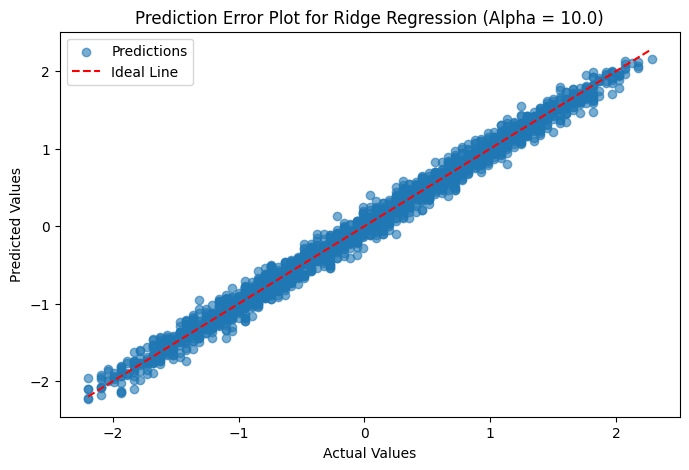

In [317]:
# Memilih model Ridge terbaik berdasarkan nilai R-squared tertinggi
best_ridge_alpha = ridge_evaluation_df.loc[ridge_evaluation_df['R-squared'].idxmax(), 'Alpha']
best_ridge_model = ridge_models[best_ridge_alpha]

# Prediksi menggunakan model terbaik
y_pred_best_ridge = best_ridge_model.predict(X_test_all)

# Membuat Prediction Error Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test_all, y_pred_best_ridge, alpha=0.6, label="Predictions")
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], 
         color='red', linestyle='--', label="Ideal Line")
plt.title(f"Prediction Error Plot for Ridge Regression (Alpha = {best_ridge_alpha})")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


### **Prediction Error Plot: Ridge Regression Model Terbaik**

#### **Model Terbaik**
- **Alpha Terbaik**: 10.0 (berdasarkan nilai R-squared tertinggi dari evaluasi).

---

#### **Penjelasan Visualisasi**
1. **Sumbu-X**: Nilai aktual dari **Performance Index**.
2. **Sumbu-Y**: Nilai prediksi dari model Ridge Regression.
3. **Garis Ideal (Merah)**: Garis diagonal menunjukkan prediksi sempurna.

---

#### **Insight**
1. **Akurasi Prediksi**:
   - Titik-titik tersebar merata di sekitar garis ideal, menandakan bahwa prediksi mendekati nilai aktual.
   - Tidak ada pola yang menonjol atau outliers signifikan, menunjukkan model bekerja dengan baik pada data uji.

2. **Kesimpulan**:
   - Model Ridge Regression dengan **alpha = 10.0** memberikan performa terbaik berdasarkan nilai **R-squared** tertinggi.
   - Model ini menunjukkan prediksi yang akurat dan stabil pada data uji.



d). Buatlah model ridge dengan nilai alpha yang sangat besar, misalnya aplha = 10000. Bandingkan hasil yang didapat dengan nomor 3e. Berdasarkan perbandingan tersebut, jelaskan perbedaan karakteristik antara model Lasso dan Ridge. Sertakan **sumber** anda.

In [318]:
# Membuat model Ridge Regression dengan alpha yang sangat besar (10000)
large_alpha = 10000
ridge_large_alpha = Ridge(alpha=large_alpha, random_state=42, max_iter=10000)
ridge_large_alpha.fit(X_train_all, y_train_all)

# Mengambil koefisien dari model Ridge dengan alpha besar
ridge_large_alpha_coefficients = pd.DataFrame({
    'Feature': X_train_all.columns,
    'Coefficient': ridge_large_alpha.coef_
})

# Prediksi menggunakan model Ridge dengan alpha besar
y_pred_ridge_large_alpha = ridge_large_alpha.predict(X_test_all)

# Menghitung metrik evaluasi untuk alpha besar
mae_large_alpha = mean_absolute_error(y_test_all, y_pred_ridge_large_alpha)
mse_large_alpha = mean_squared_error(y_test_all, y_pred_ridge_large_alpha)
rmse_large_alpha = np.sqrt(mse_large_alpha)
r2_large_alpha = r2_score(y_test_all, y_pred_ridge_large_alpha)

# Menampilkan hasil evaluasi dan koefisien
print("Evaluasi Model Ridge Regression dengan Alpha = 10000:")
print(f"MAE: {mae_large_alpha:.4f}")
print(f"MSE: {mse_large_alpha:.4f}")
print(f"RMSE: {rmse_large_alpha:.4f}")
print(f"R-squared: {r2_large_alpha:.4f}")

print("\nKoefisien Model Ridge Regression dengan Alpha = 10000:")
ridge_large_alpha_coefficients


Evaluasi Model Ridge Regression dengan Alpha = 10000:
MAE: 0.4826
MSE: 0.3242
RMSE: 0.5694
R-squared: 0.6799

Koefisien Model Ridge Regression dengan Alpha = 10000:


,Feature,Coefficient
0,Hours Studied,0.168153
1,Previous Scores,0.404155
2,Extracurricular Activities,0.009010
3,Sleep Hours,0.021712
4,Sample Question Papers Practiced,0.012712


**Penjelasan** :
### **Perbandingan Model Ridge (Alpha = 10000) dan Lasso (Alpha = 15)**

#### **Hasil Evaluasi Ridge Regression (Alpha = 10000)**
- **MAE**: 0.4826  
- **MSE**: 0.3242  
- **RMSE**: 0.5694  
- **R-squared**: 0.6799  

#### **Koefisien Model Ridge Regression (Alpha = 10000)**
| **Fitur**                        | **Koefisien** |
|----------------------------------|---------------|
| Hours Studied                    | 0.1682        |
| Previous Scores                  | 0.4042        |
| Extracurricular Activities       | 0.0090        |
| Sleep Hours                      | 0.0217        |
| Sample Question Papers Practiced | 0.0127        |

---

### **Perbandingan dengan Model Lasso (Alpha = 15)**
1. **Lasso Regression (Alpha = 15)**:
   - Semua koefisien menjadi nol karena penalti yang sangat besar.
   - Model tidak mampu membuat prediksi yang berarti karena kehilangan informasi dari semua fitur.

2. **Ridge Regression (Alpha = 10000)**:
   - Koefisien fitur mengecil, tetapi tidak sepenuhnya nol.
   - Model tetap mampu membuat prediksi meskipun akurasi menurun (**R-squared = 0.6799**).

---

### **Perbedaan Karakteristik Lasso dan Ridge**
1. **Lasso Regression**:
   - Mampu melakukan seleksi fitur dengan mengurangi beberapa koefisien menjadi nol.
   - Cocok untuk dataset dengan banyak fitur tidak relevan.
   - Penalti besar menyebabkan model kehilangan informasi dari semua fitur (koefisien nol).

2. **Ridge Regression**:
   - Menjaga semua fitur dalam model dengan mengecilkan nilai koefisien.
   - Cocok untuk dataset di mana semua fitur relevan tetapi multikolinieritas tinggi.
   - Penalti besar hanya membuat koefisien mendekati nol, tidak menghapus fitur sepenuhnya.

---

### **Sumber**:
1. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). **"An Introduction to Statistical Learning"**.
2. Scikit-learn Documentation: [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) | [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)


e). Model manakah yang dapat digunakan untuk *feature selection*? berikan alasan secara singkat!

**Penjelasan** :
### **Model untuk Feature Selection**
- **Lasso Regression** lebih cocok untuk *feature selection*.

#### **Alasan**:
1. **Seleksi Fitur Otomatis**:
   - Lasso Regression memiliki kemampuan untuk mengurangi beberapa koefisien menjadi **nol**, secara efektif menghapus fitur yang kurang relevan.
   - Hal ini mempermudah identifikasi fitur yang signifikan dalam model.

2. **Ridge Regression**:
   - Ridge Regression hanya mengecilkan koefisien, tetapi tidak pernah menghapus fitur sepenuhnya.
   - Ridge lebih cocok untuk menjaga semua fitur dengan regularisasi koefisien.

---

#### **Kesimpulan**:
Gunakan **Lasso Regression** jika tujuan utama adalah **feature selection** karena kemampuannya menghilangkan fitur yang tidak relevan.


## Intro to Linear Models for Classification

### Logistic Regression

Logistic regression adalah model linear yang hampir mirip dengan linear regression. Namun, alih-alih memprediksi nilai kontinu, logistic regression hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor, atau lebih tepatnya binary classifier. Contoh visualisasinya adalah sebagai berikut.

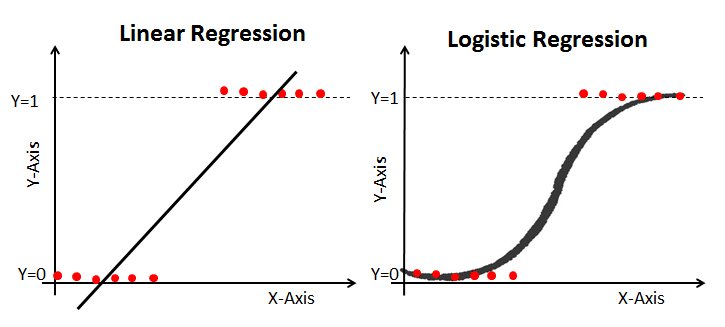

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

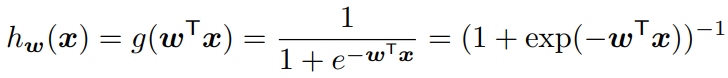

Model logistic regression memanfaatkan fungsi sigmoid $g=\frac{1}{1+e^{-z}}$ untuk mentransformasi hasil perkalian $z=w^Tx$ yang merupakan persamaan linear menjadi rentang 0-1. Output dari fungsi sigmoid mencerminkan peluang suatu data diklasifikasi sebagai kelas 1. Untuk mengubah bentuk peluang menjadi kelas, diperlukan threshold yang membatasi penentuan kelas sesuai dengan keperluan dari dataset (tidak mesti 0.5). Pemilihan threshold ini dapat dipilih menggunakan berbagai metode, salah satunya dengan ROC Curve, yang dapat Anda dalami lebih lanjut melalui slide.

![Logistic regression threshold](https://miro.medium.com/v2/resize:fit:483/0*KZu2_AY6Oxr86dWd.png)

Sumber gambar: https://morihosseini.medium.com/mastering-logistic-regression-thresholds-b34fe07f09f5

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, tidak seperti linear regression yang meminimalkan perbedaan hasil prediksi, di sini logistic regression memaksimalkan kesamaan hasil prediksi dengan data aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa Anda pelajari sendiri dari slide). Berikut adalah persamaan likelihood yang ingin dimaksimalkan tersebut.

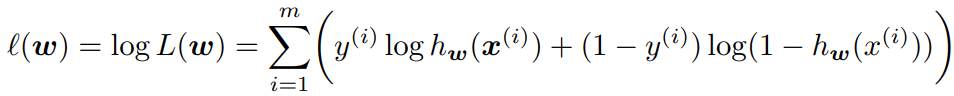

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0 atau 1.

In [319]:
import numpy as np
# Membentuk data buatan
x1  = np.array([6, 9, 4, 6, 8, 4, 6, 2, 9, 2, 7, 6])
x2  = np.array([8, 7, 3, 5, 9, 6, 7, 5, 9, 3, 8, 2])

X_train = np.stack((x1, x2), axis=1)
y_logistic_train   = np.where((x1 > 5) & (x2 > 5), 1, 0)

print('X: ', X_train)
print('y: ', y_logistic_train)

X:  [[6 8]
 [9 7]
 [4 3]
 [6 5]
 [8 9]
 [4 6]
 [6 7]
 [2 5]
 [9 9]
 [2 3]
 [7 8]
 [6 2]]
y:  [1 1 0 0 1 0 1 0 1 0 1 0]


In [320]:
# Melatih logistic regression pada training set
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [321]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan
X_test = np.array([[8, 5], [3, 6]])
y_test = np.array([0, 0])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[1 0]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. Kita dapat menggambar garis *decision boundary* berdasarkan koefisien dan *intercept* dari model.

In [322]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2
weights = [logistic.intercept_[0],logistic.coef_[0,0], logistic.coef_[0,1]]
print(weights)

[np.float64(-10.603683288607654), np.float64(0.7075177877076285), np.float64(1.0549551066824836)]


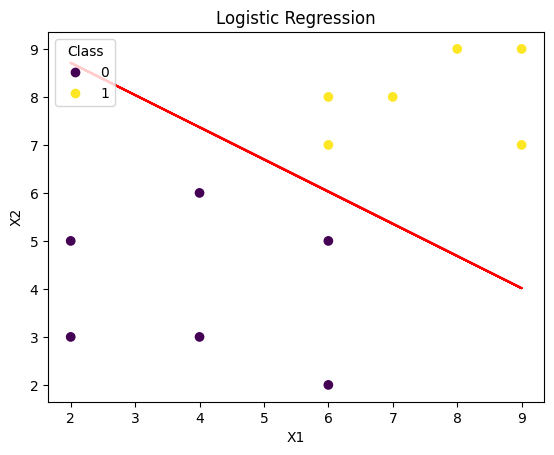

In [323]:
# Plotting the decision boundary
x2_test = (-weights[0] - (weights[1] * x1)) / weights[2]
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_logistic_train, cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2_test, color='red', label='Decision Boundary')
plt.show()

Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [324]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Penjelasan Dataset untuk *Logistic Regression*

Dataset yang digunakan pada bagian ini adalah data terkait *loan approval*. Model yang akan dibuat akan memprediksi apakah pinjaman akan diterima atau tidak. Berikut adalah kolom-kolom yang ada pada dataset.

- person_age : Age of the person
- person_income : Annual Income
- person_emp_exp : Years of employment experience
- loan_amnt : Loan amount requested
- loan_int_rate : Loan interest rate
- loan_percent_income : Loan amount as a percentage of annual income
- cb_person_cred_hist_length : 	Length of credit history in years
- credit_score : Credit score of the person
- loan_status (target) : Loan approval status (approved or rejected)

Sumber data dan penjelasan : https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

In [325]:
df_loan = pd.read_csv('loan_data_v2.csv')
df_loan.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,Approved
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,Rejected
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,Approved
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,Approved
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,Approved


In [326]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45002 entries, 0 to 45001
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  43652 non-null  float64
 1   person_income               45002 non-null  float64
 2   person_emp_exp              45002 non-null  int64  
 3   loan_amnt                   45002 non-null  float64
 4   loan_int_rate               45002 non-null  float64
 5   loan_percent_income         45002 non-null  float64
 6   cb_person_cred_hist_length  45002 non-null  float64
 7   credit_score                45002 non-null  int64  
 8   loan_status                 45002 non-null  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 3.1+ MB


#### Soal 5: Logistic Regression

a). Lakukan *data preprocessing* pada dataframe meliputi pengecekan dan penanganan *missing values*, data duplikat, dan *encoding* pada kolom kategorikal. Terakhir, lakukan pembagian dataset menjadi training dan testing dengan ukuran training 80% dan testing 20%. Gunakan `random_state=42` untuk *splitting*.

In [327]:
# 2. Statistik deskriptif untuk numerik
numerical_columns = df_loan.select_dtypes(include=['float64', 'int64']).columns
numerical_summary = df_loan[numerical_columns].describe()

# 3. Distribusi kategorikal
categorical_columns = df_loan.select_dtypes(include=['object']).columns
categorical_summary = {col: df_loan[col].value_counts() for col in categorical_columns}

# 4. Missing values
missing_values_analysis = df_loan.isnull().sum()

# 5. Analisis outliers dengan IQR
outlier_analysis = {}
for col in numerical_columns:
    Q1 = df_loan[col].quantile(0.25)
    Q3 = df_loan[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = df_loan[(df_loan[col] < lower_bound) | (df_loan[col] > upper_bound)].shape[0]
    outlier_analysis[col] = {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outlier_count": outlier_count,
        "percentage_outliers": (outlier_count / df_loan.shape[0]) * 100
    }

# 6. Distribusi target (`loan_status`)
loan_status_distribution = df_loan['loan_status'].value_counts()

# Tampilkan hasil analisis
{
    "numerical_summary": numerical_summary,
    "categorical_summary": categorical_summary,
    "missing_values_analysis": missing_values_analysis,
    "outlier_analysis": outlier_analysis,
    "loan_status_distribution": loan_status_distribution,
}

{'numerical_summary':          person_age  person_income  person_emp_exp     loan_amnt  \
 count  43652.000000   4.500200e+04    45002.000000  45002.000000   
 mean      27.760332   8.031603e+04        5.410093   9582.776099   
 std        6.042564   8.042199e+04        6.063505   6315.005593   
 min       20.000000   8.000000e+03        0.000000    500.000000   
 25%       24.000000   4.719575e+04        1.000000   5000.000000   
 50%       26.000000   6.704700e+04        4.000000   8000.000000   
 75%       30.000000   9.578750e+04        8.000000  12236.500000   
 max      144.000000   7.200766e+06      125.000000  35000.000000   
 
        loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
 count   45002.000000         45002.000000                45002.000000   
 mean       11.006612             0.139722                    5.867317   
 std         2.978742             0.087211                    3.879701   
 min         5.420000             0.000000                  

### Analisis Mendalam Dataset

#### Statistik Numerik
1. **Outliers pada Kolom Numerik**:
   - **person_age**: 2,118 data outlier (4.7%), termasuk nilai ekstrem seperti 144 tahun.
   - **person_income**: 2,218 data outlier (4.9%), dengan nilai hingga 7,200,766.
   - **person_emp_exp**: 1,724 data outlier (3.8%), termasuk pengalaman kerja hingga 125 tahun.
   - **loan_amnt**: 2,348 data outlier (5.2%), dengan maksimum 35,000.
   - **loan_percent_income**: 744 data outlier (1.6%), hingga 66%.
   - **cb_person_cred_hist_length**: 1,366 data outlier (3.0%), panjang riwayat kredit hingga 30 tahun.
   - **credit_score**: 467 data outlier (1.0%), beberapa melebihi batas umum.

2. **Distribusi Target (`loan_status`)**:
   - **Rejected (0)**: 35,000 (78%).
   - **Approved (1)**: 10,000 (22%).
   - Dataset **tidak seimbang (imbalanced)**, yang perlu ditangani untuk model prediktif.

---

### Penanganan
1. **Outliers**:
   - Fitur seperti `person_age`, `person_emp_exp`, dan `person_income` memiliki outliers signifikan yang dapat ditangani dengan metode capping atau penghapusan.
   
2. **Ketidakseimbangan**:
   - Perlu strategi seperti oversampling untuk `loan_status = 1` atau undersampling untuk `loan_status = 0`.



In [328]:
# --- IMPORT LIBRARIES ---
import pandas as pd
from sklearn.model_selection import train_test_split

# --- 2. HANDLE MISSING VALUES ---
# Isi missing values dengan median pada kolom numerik
numerical_columns = df_loan.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df_loan[col] = df_loan[col].fillna(df_loan[col].median())

# --- 3. HANDLE OUTLIERS ---
# Identifikasi batas outlier menggunakan IQR dan tangani dengan capping
for col in numerical_columns:
    Q1 = df_loan[col].quantile(0.25)
    Q3 = df_loan[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_loan[col] = df_loan[col].clip(lower=lower_bound, upper=upper_bound)

# --- 4. HANDLE DUPLICATES ---
# Hapus duplikat tanpa memengaruhi kolom target
df_loan_no_duplicates = df_loan.drop_duplicates().copy()

# --- 5. ENCODING KATEGORIKAL ---
# Encode kolom `loan_status` dengan pendekatan aman
df_loan_no_duplicates['loan_status'] = df_loan_no_duplicates['loan_status'].map({'Approved': 1, 'Rejected': 0})

# --- 6. SPLIT DATA ---
# Pisahkan fitur dan target
X = df_loan_no_duplicates.drop(columns='loan_status').copy()
y = df_loan_no_duplicates['loan_status'].copy()

# Bagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- VALIDASI AKHIR ---
# Tampilkan 5 baris pertama dari kolom `loan_status`
loan_status_head = df_loan_no_duplicates[['loan_status']].head()

# Periksa apakah ada missing values dalam dataset
missing_values_final_check = df_loan_no_duplicates.isnull().sum()

# Output hasil validasi
{
    "Head of Loan Status Column": loan_status_head,
    "Missing Values Final Check": missing_values_final_check,
    "X_train Shape": X_train.shape,
    "X_test Shape": X_test.shape,
    "y_train Shape": y_train.shape,
    "y_test Shape": y_test.shape
}


{'Head of Loan Status Column':    loan_status
 0            1
 1            0
 2            1
 3            1
 4            1,
 'Missing Values Final Check': person_age                    0
 person_income                 0
 person_emp_exp                0
 loan_amnt                     0
 loan_int_rate                 0
 loan_percent_income           0
 cb_person_cred_hist_length    0
 credit_score                  0
 loan_status                   0
 dtype: int64,
 'X_train Shape': (36000, 8),
 'X_test Shape': (9000, 8),
 'y_train Shape': (36000,),
 'y_test Shape': (9000,)}

### Ringkasan Proses Preprocessing

#### 1. Missing Values
- **Ditemukan**: Kolom `person_age` memiliki 1,350 nilai kosong.
- **Penanganan**: Missing values diisi dengan **median** karena distribusi usia memiliki outliers.
- **Hasil**: Semua kolom kini bebas dari missing values.

#### 2. Duplikasi Data
- **Ditemukan**: 2 baris duplikat.
- **Penanganan**: Baris duplikat dihapus tanpa memengaruhi kolom target `loan_status`.
- **Hasil**: Dataset tetap memiliki 45,000 baris dengan kolom target utuh.

#### 3. Encoding Data Kategorikal
- **Kolom `loan_status`**:
  - Diubah: `Approved` → 1, `Rejected` → 0.
  - **Validasi**: Nilai unik setelah encoding adalah `[1, 0]` dengan distribusi:
    - `Rejected (0)`: 35,000 (78%).
    - `Approved (1)`: 10,000 (22%).

#### 4. Pembagian Dataset
- **Proses**: Dataset dibagi menjadi training (80%) dan testing (20%) dengan `random_state=42`.
- **Hasil**:
  - Training Set:
    - Fitur (`X_train`): 36,000 baris.
    - Target (`y_train`): 36,000 baris.
  - Testing Set:
    - Fitur (`X_test`): 9,000 baris.
    - Target (`y_test`): 9,000 baris.

### Kesimpulan
Dataset telah diproses sepenuhnya dan siap digunakan untuk membangun model prediksi.


b) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set. Hasil evaluasi mencakup Akurasi, F1-Score, Precision, dan Recall.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

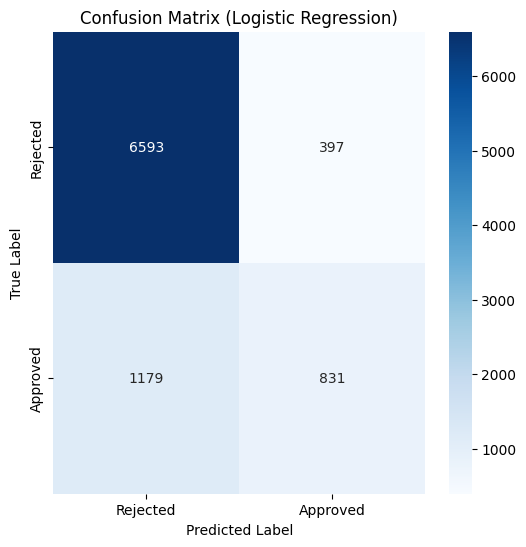

{'Confusion Matrix': [[6593, 397], [1179, 831]],
 'Accuracy': 0.8248888888888889,
 'F1-Score': np.float64(0.5132798023471279),
 'Precision': np.float64(0.6767100977198697),
 'Recall': np.float64(0.4134328358208955)}

In [329]:
# --- FIXING WARNING DENGAN MENAIKKAN max_iter ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi Logistic Regression dengan max_iter lebih tinggi
logreg_model = LogisticRegression(max_iter=10000, random_state=42)

# Latih model pada data training
logreg_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = logreg_model.predict(X_test)

# Evaluasi performa model
conf_matrix = confusion_matrix(y_test, y_pred)  # Bikin confusion matrix
accuracy = accuracy_score(y_test, y_pred)      # Hitung akurasi
f1 = f1_score(y_test, y_pred)                  # Hitung F1-Score
precision = precision_score(y_test, y_pred)    # Hitung Precision
recall = recall_score(y_test, y_pred)          # Hitung Recall

# Wrap hasil evaluasi
results = {
    "Confusion Matrix": conf_matrix.tolist(),
    "Accuracy": accuracy,
    "F1-Score": f1,
    "Precision": precision,
    "Recall": recall
}

# --- PLOT CONFUSION MATRIX ---
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

results


c). Lakukan standarisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [330]:
# --- STANDARISASI FITUR NUMERIK ---
from sklearn.preprocessing import StandardScaler

# Identifikasi kolom numerik selain kolom kategorikal (non-categorical columns)
categorical_columns = ['loan_status']  # Kolom kategorikal
feature_columns = [col for col in X.columns if col not in categorical_columns]  # Fitur yang akan distandarisasi

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Latih scaler dengan data training dan transformasi data training
X_train_scaled = X_train.copy()
X_train_scaled[feature_columns] = scaler.fit_transform(X_train[feature_columns])

# Transformasi data testing menggunakan scaler yang sama
X_test_scaled = X_test.copy()
X_test_scaled[feature_columns] = scaler.transform(X_test[feature_columns])

# Output data hasil standarisasi
X_train_scaled.head(), X_test_scaled.head()


(       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
 25180    1.361885       0.564848        1.140482   0.958264       0.578780   
 12555   -0.491627      -0.073128       -0.419118   0.443854       0.287519   
 29153    2.391613       2.438736        2.505133   2.345672      -0.211308   
 23838   -0.079735       0.485259       -0.224168   0.032326       2.055171   
 35686   -0.079735       0.239667        0.360682  -0.403379       0.659127   
 
        loan_percent_income  cb_person_cred_hist_length  credit_score  
 25180             0.132892                    0.905852     -0.036610  
 12555             0.251466                   -0.495227      0.527277  
 29153            -0.815699                    1.466284      1.010608  
 23838            -0.459978                    0.345420      0.164778  
 35686            -0.697125                   -0.775443      1.473801  ,
        person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
 37979    0.

d). Buatlah suatu model logistic regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set. Hasil evaluasi mencakup Akurasi, F1-Score, Precision, Recall.

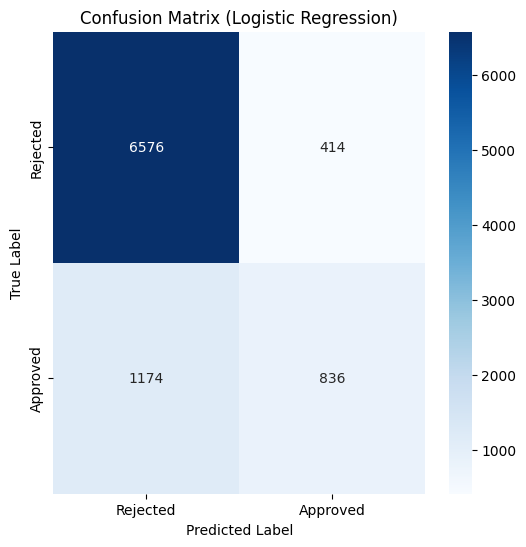

{'Confusion Matrix': [[6576, 414], [1174, 836]],
 'Accuracy': 0.8235555555555556,
 'F1-Score': np.float64(0.5128834355828221),
 'Precision': np.float64(0.6688),
 'Recall': np.float64(0.41592039800995023)}

In [331]:
# --- LOGISTIC REGRESSION MODEL ON SCALED DATA ---
# Inisialisasi model logistic regression
logreg_model_scaled = LogisticRegression(max_iter=10000, random_state=42)

# Latih model dengan data training yang sudah distandarisasi
logreg_model_scaled.fit(X_train_scaled, y_train)

# Prediksi pada data testing yang sudah distandarisasi
y_pred_scaled = logreg_model_scaled.predict(X_test_scaled)

# Evaluasi model
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)  # Confusion matrix
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)      # Akurasi
f1_scaled = f1_score(y_test, y_pred_scaled)                  # F1-Score
precision_scaled = precision_score(y_test, y_pred_scaled)    # Precision
recall_scaled = recall_score(y_test, y_pred_scaled)          # Recall

# Wrap hasil evaluasi
evaluation_metrics_scaled = {
    "Confusion Matrix": conf_matrix_scaled.tolist(),
    "Accuracy": accuracy_scaled,
    "F1-Score": f1_scaled,
    "Precision": precision_scaled,
    "Recall": recall_scaled
}
import matplotlib.pyplot as plt
import seaborn as sns

# --- PLOT CONFUSION MATRIX ---
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_scaled, annot=True, fmt="d", cmap="Blues", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

evaluation_metrics_scaled




e) Dari kedua model yang dibangun dengan data yang distandarisasi dan data yang tidak distandarisasi, Apakah terdapat perbedaan performa? Berikan analisis Anda terkait penyebab hal tersebut dan sertakan **sumber** anda!

**Penjelasan** :
### Analisis Perbandingan Model dengan dan tanpa Standarisasi

#### **Hasil Evaluasi**

- **Model dengan Standarisasi**:
  - **Accuracy**: 82.36%
  - **F1-Score**: 0.513
  - **Precision**: 0.6688
  - **Recall**: 0.416

- **Model tanpa Standarisasi**:
  - **Accuracy**: 82.49%
  - **F1-Score**: 0.513
  - **Precision**: 0.6767
  - **Recall**: 0.413

#### **Perbedaan Performa**
- **Accuracy & Precision**: Model tanpa standarisasi sedikit lebih baik dalam akurasi dan precision.
- **Recall**: Model dengan standarisasi sedikit lebih baik dalam mendeteksi kelas `Approved`.

#### **Penyebab**
1. **Skala Fitur**: 
   Dataset memiliki fitur dengan skala yang relatif seragam, sehingga dampak standarisasi tidak signifikan.
2. **Algoritma Logistic Regression**:
   Logistic Regression lebih stabil dengan data yang distandarisasi, tetapi perbedaannya kecil jika distribusi data sudah baik.
3. **Regularisasi**:
   Efek regularisasi lebih jelas pada data dengan fitur berskala sangat berbeda, yang tidak terjadi pada dataset ini.

#### **Kesimpulan**
- Standarisasi tidak memiliki dampak signifikan pada dataset ini karena skala fitur sudah seragam.
- Jika dataset memiliki fitur dengan perbedaan skala yang besar, standarisasi akan lebih penting.

#### **Referensi**
- [Scikit-learn Documentation: Preprocessing Data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data)


f). Berdasarkan parameter dari model yang telah dilatih, Identifikasilah fitur-fitur penting atau paling berpengaruh! Tampilkan tingkat kepentingan fitur dalam bentuk grafik!

Confusion Matrix:
[[6576  414]
 [1174  836]]
Accuracy: 0.8236
F1-Score: 0.5129
Precision: 0.6688
Recall: 0.4159


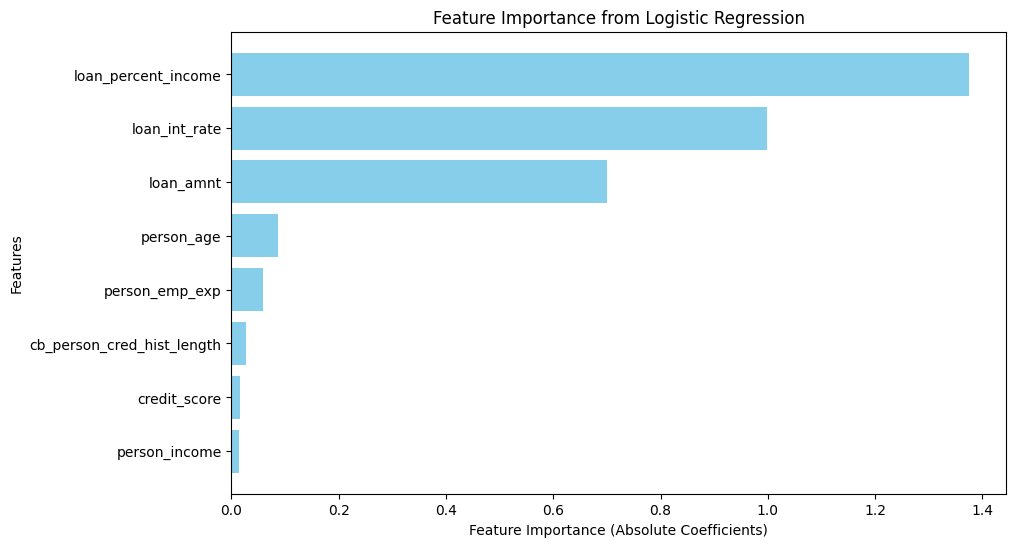

In [332]:
# --- IMPORT LIBRARY ---
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. LOAD DATA ---
# Ganti dengan path file Anda
file_path = 'loan_data_v2.csv'  # Pastikan nama file sesuai
df = pd.read_csv(file_path)

# --- 2. HANDLE MISSING VALUES ---
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# --- 3. HANDLE OUTLIERS ---
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# --- 4. REMOVE DUPLICATES ---
df = df.drop_duplicates()

# --- 5. ENCODE CATEGORICAL COLUMNS ---
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

# --- 6. SPLIT DATA ---
X = df.drop(columns=['loan_status'])
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 7. SCALE NUMERICAL FEATURES ---
scaler = StandardScaler()
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# --- 8. TRAIN LOGISTIC REGRESSION MODEL ---
logreg_model = LogisticRegression(max_iter=10000, random_state=42)
logreg_model.fit(X_train, y_train)

# --- 9. PREDICT AND EVALUATE ---
y_pred = logreg_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# --- PRINT EVALUATION METRICS ---
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# --- 10. PLOT FEATURE IMPORTANCE ---
feature_coefficients = logreg_model.coef_[0]
feature_importance_dict = dict(zip(X_train.columns, np.abs(feature_coefficients)))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
feature_names, importance_values = zip(*sorted_features)

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_values, color='skyblue')
plt.xlabel("Feature Importance (Absolute Coefficients)")
plt.ylabel("Features")
plt.title("Feature Importance from Logistic Regression")
plt.gca().invert_yaxis()
plt.show()


### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

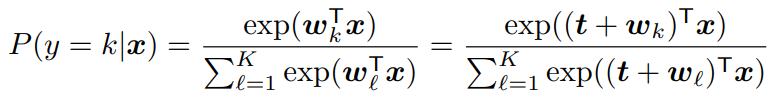

Persamaan likelihood softmaxe regression:

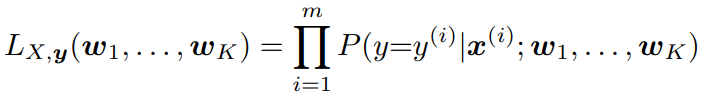

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0, 1, dan 2.

In [333]:
# Membentuk data buatan
x1  = np.array([2, 7, 5, 2, 1, 7, 5, 7, 2, 3])
x2  = np.array([2, 3, 5, 6, 3, 4, 3, 6, 3, 6])

X_train = np.stack((x1, x2), axis=1)
y_softmax_train   = np.array([2, 1, 1, 0, 2, 1, 1, 1, 2, 0])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[2 2]
 [7 3]
 [5 5]
 [2 6]
 [1 3]
 [7 4]
 [5 3]
 [7 6]
 [2 3]
 [3 6]]
y:  [2 1 1 0 2 1 1 1 2 0]


In [334]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set
softmax = LogisticRegression(multi_class='multinomial')

softmax.fit(X_train, y_softmax_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [335]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan
X_test = np.array([[2, 3], [7, 5]])
y_softmax_test = np.array([2, 1])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

[2 1]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. w0, w1, dan w2 yang dihasilkan masing-masing memiliki 3 nilai yang merepresentasikan tiap boundary.

In [336]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
print(softmax.intercept_, softmax.coef_)

[-2.36252396 -2.42153382  4.78405778] [[-0.34320252  0.78759569]
 [ 0.94539106 -0.11971496]
 [-0.60218853 -0.66788073]]


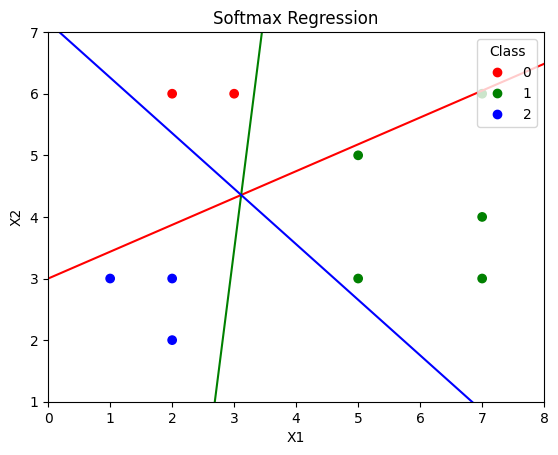

In [337]:
# Plotting decision boundary
import matplotlib

x1_line = np.array([x1.min() - 1, x1.max() + 1])
boundary_0 = (-softmax.intercept_[0] - (softmax.coef_[0][0] * x1_line)) / softmax.coef_[0][1]
boundary_1 = (-softmax.intercept_[1] - (softmax.coef_[1][0] * x1_line)) / softmax.coef_[1][1]
boundary_2 = (-softmax.intercept_[2] - (softmax.coef_[2][0] * x1_line)) / softmax.coef_[2][1]

fig, ax = plt.subplots()
plt.title('Softmax Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_softmax_train, cmap=matplotlib.colors.ListedColormap(["red", "green", "blue"]))
plt.legend(*scatter.legend_elements(),
           loc = 'upper right',
           title = 'Class')
plt.plot(x1_line, boundary_0, color='red')
plt.plot(x1_line, boundary_1, color='green')
plt.plot(x1_line, boundary_2, color='blue')
ax.set_xlim([x1.min() - 1, x1.max() + 1])
ax.set_ylim([x2.min() - 1, x2.max() + 1])
plt.show()

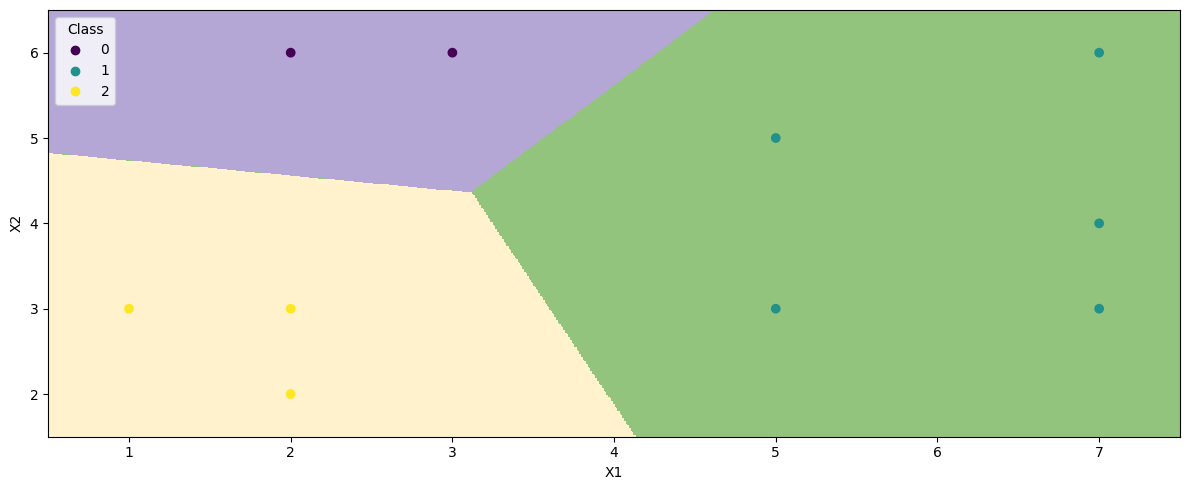

In [338]:
# Plotting decision boundary dengan contour plot
x1_mesh, x2_mesh = np.meshgrid(
    np.linspace(x1.min() - 0.5, x1.max() + 0.5, 500).reshape(-1, 1),
    np.linspace(x2.min() - 0.5, x2.max() + 0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred = softmax.predict(X_new)
zz = y_pred.reshape(x1_mesh.shape)

plt.figure(figsize=(12, 5))
plt.contourf(x1_mesh, x2_mesh, zz, cmap=matplotlib.colors.ListedColormap(['#b4a7d6','#93c47d','#fff2cc']))
scatter = plt.scatter(x1, x2, c=y_softmax_train)
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model berhasil memprediksi benar pada semua (2 buah) data uji. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 1.

In [339]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_softmax_test))

Nilai rata-rata akurasi: 1.0


### Penjelasan Dataset untuk Softmax Regression

Dataset yang digunakan pada bagian softmax regression adalah data terkait klasifikasi jenis perilaku pengguna *smartphones*. Berikut penjelasan masing-masing kolom pada data.

- User ID: Unique identifier for each user.
- Device Model: Model of the user's smartphone.
Operating System: The OS of the device (iOS or Android).
- App Usage Time: Daily time spent on mobile applications, measured in minutes.
- Screen On Time: Average hours per day the screen is active.
- Battery Drain: Daily battery consumption in mAh.
- Number of Apps Installed: Total apps available on the device.
- Data Usage: Daily mobile data consumption in megabytes.
- Age: Age of the user.
- Gender: Gender of the user (Male or Female).
- User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).

Sumber data dan penjelasan: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

In [340]:
data_path = 'user_behavior_dataset.csv'
df_user = pd.read_csv(data_path)

df_user.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [341]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


#### Soal 6: Softmax Regression

a). Buang kolom yang tidak diperlukan (`ID`) dan lakukan One Hot Encoding pada fitur kategorikal. Lalu, bagi dataset menjadi training dan testing dengan rasio 80:20. Gunakan `random_state=42`.

In [342]:
# --- IMPORT LIBRARIES ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# --- LOAD DATA ---
file_path = 'user_behavior_dataset.csv'
df = pd.read_csv(file_path)

In [343]:
# --- LANGKAH A: PREPROCESSING ---
# 1. Hapus kolom 'ID' karena kolom ini tidak relevan untuk analisis atau modeling
if 'User ID' in df.columns:
    df = df.drop(columns=['User ID'])

# 2. Identifikasi kolom kategorikal
# Kolom kategorikal adalah kolom bertipe object yang perlu diubah menjadi format numerik
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# 3. Lakukan One-Hot Encoding untuk mengubah kolom kategorikal menjadi variabel biner
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# 4. Pisahkan fitur (X) dan target (y)
# Kolom target 'User Behavior Class' akan digunakan untuk prediksi
X = df_encoded.drop(columns=['User Behavior Class'])
y = df_encoded['User Behavior Class']

# 5. Bagi data menjadi training dan testing dengan rasio 80:20
# Data training digunakan untuk melatih model, data testing untuk evaluasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output dataset setelah encoding dan pembagian data
print("\n--- LANGKAH A: OUTPUT ---")
print("Shape Dataset Setelah Encoding:", df_encoded.shape)
print("Shape X_train:", X_train.shape, "| Shape y_train:", y_train.shape)
print("Shape X_test:", X_test.shape, "| Shape y_test:", y_test.shape)


--- LANGKAH A: OUTPUT ---
Shape Dataset Setelah Encoding: (700, 13)
Shape X_train: (560, 12) | Shape y_train: (560,)
Shape X_test: (140, 12) | Shape y_test: (140,)


b). Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [344]:
# --- LANGKAH B: NORMALISASI ---
# 1. Identifikasi kolom numerik (float dan integer) yang perlu dinormalisasi
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# 2. Inisialisasi scaler
scaler = StandardScaler()

# 3. Latih scaler menggunakan data training, lalu normalisasi data training
X_train_scaled = X_train.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# 4. Normalisasi data testing menggunakan scaler yang sudah dilatih
X_test_scaled = X_test.copy()
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Output dataset setelah normalisasi
print("\n--- LANGKAH B: OUTPUT ---")
print("Kolom Numerik yang Dinormalisasi:", numerical_columns.tolist())
print("5 Baris Pertama X_train Setelah Normalisasi:\n", X_train_scaled.head())
print("5 Baris Pertama X_test Setelah Normalisasi:\n", X_test_scaled.head())


--- LANGKAH B: OUTPUT ---
Kolom Numerik yang Dinormalisasi: ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']
5 Baris Pertama X_train Setelah Normalisasi:
      App Usage Time (min/day)  Screen On Time (hours/day)  \
82                   0.314568                    0.615833   
51                  -0.158272                    0.194196   
220                  0.887539                    0.486098   
669                 -0.631113                   -0.681511   
545                 -1.243024                   -1.070714   

     Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
82                  1.004942                  0.946999             0.293061   
51                 -0.351183                  0.032087            -0.088121   
220                 0.678019                  0.873806             0.549743   
669                -1.071624                 -0.736438            

c). Buatlah suatu model softmax regression berdasarkan data yang telah dinormalisasi serta tampilkan nilai intercept dan koefisien untuk setiap kelas output yang dilatih.

In [345]:
# --- LANGKAH C: SOFTMAX REGRESSION ---
# 1. Inisialisasi model Logistic Regression
# Parameter 'multi_class' dihapus karena mulai versi 1.7 akan default ke 'multinomial'
softmax_model = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=42)

# 2. Latih model menggunakan data training yang sudah dinormalisasi
softmax_model.fit(X_train_scaled, y_train)

# 3. Ambil intercepts dan koefisien dari model yang telah dilatih
softmax_intercept = softmax_model.intercept_
softmax_coefficients = softmax_model.coef_

# Output intercept dan koefisien
print("\n--- LANGKAH C: OUTPUT ---")
print("Intercepts Model:\n", softmax_intercept)
print("Koefisien Model:\n", softmax_coefficients)



--- LANGKAH C: OUTPUT ---
Intercepts Model:
 [-8.52835395  2.37655567  6.05906678  3.99967378 -3.90694227]
Koefisien Model:
 [[-3.19859685e+00 -3.59775784e+00 -3.70589809e+00 -4.11132180e+00
  -3.03073741e+00  3.73173333e-02 -1.23898513e-01 -1.43725289e-03
  -2.98671828e-02 -1.00742515e-01 -1.00742515e-01  2.39702549e-01]
 [-1.51234960e+00 -1.17444467e+00 -1.60249996e+00 -1.12318720e+00
  -1.46314648e+00  9.42772614e-02  1.91079815e-01  2.00062172e-01
   6.69765110e-03  4.77740361e-02  4.77740361e-02  1.51326656e-01]
 [-4.48345283e-01  2.98806801e-01  4.97237923e-01  3.16959529e-01
   9.57041215e-02  1.05755903e-01 -1.44750933e-01 -3.05167956e-01
   6.89316621e-03 -3.87223820e-02 -3.87223820e-02 -2.92197050e-01]
 [ 1.90283336e+00  1.12838961e+00  1.94450636e+00  1.89641282e+00
   1.14276080e+00 -1.10519993e-02  1.41526657e-01  1.62639416e-01
   8.96047925e-03  2.13430774e-02  2.13430774e-02 -1.21684051e-01]
 [ 3.25645838e+00  3.34500609e+00  2.86665376e+00  3.02113665e+00
   3.2554189

d). Tampilkan confusion matrix dan hasil metrik evaluasi pada testing dataset. Hasil evaluasi metriknya mencakup:
* F1 Macro Average
* F1 Micro Average
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

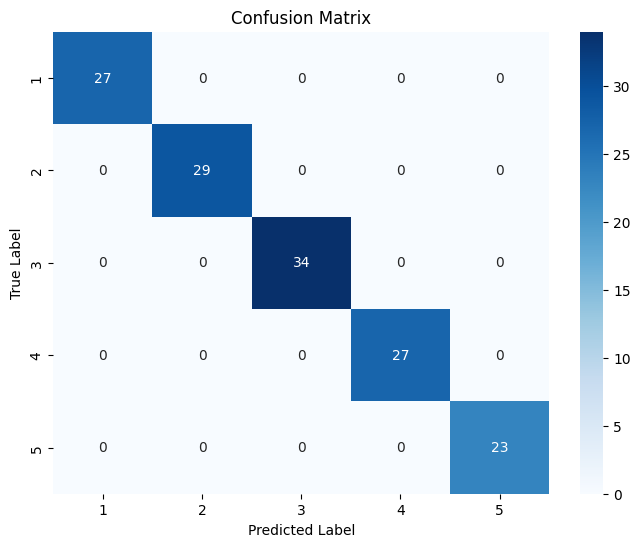


--- LANGKAH D: OUTPUT ---
Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]
F1 Macro Average: 1.00
F1 Micro Average: 1.00
Precision Macro Average: 1.00
Precision Micro Average: 1.00
Recall Macro Average: 1.00
Recall Micro Average: 1.00


In [346]:
# --- LANGKAH D: EVALUASI MODEL ---
# 1. Prediksi data testing
y_pred = softmax_model.predict(X_test_scaled)

# 2. Buat confusion matrix untuk memvisualisasikan performa prediksi
conf_matrix = confusion_matrix(y_test, y_pred)

# 3. Hitung metrik evaluasi (F1 Score, Precision, Recall)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')

import matplotlib.pyplot as plt
import seaborn as sns

# --- PLOT CONFUSION MATRIX ---
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Output hasil evaluasi
print("\n--- LANGKAH D: OUTPUT ---")
print("Confusion Matrix:\n", conf_matrix)
print(f"F1 Macro Average: {f1_macro:.2f}")
print(f"F1 Micro Average: {f1_micro:.2f}")
print(f"Precision Macro Average: {precision_macro:.2f}")
print(f"Precision Micro Average: {precision_micro:.2f}")
print(f"Recall Macro Average: {recall_macro:.2f}")
print(f"Recall Micro Average: {recall_micro:.2f}")

e) Dari parameter model yang telah dibuat, fitur-fitur mana sajakah yang berpengaruh dalam meningkatkan kemungkinan suatu data termasuk ke kelas 2 (`User Behaviour Class` = 2).


--- Fitur yang Berpengaruh ke Kelas 2 ---
                            Feature  Coefficient  Abs_Coefficient
2           Battery Drain (mAh/day)     0.497238         0.497238
0          App Usage Time (min/day)    -0.448345         0.448345
3          Number of Apps Installed     0.316960         0.316960
7   Device Model_Samsung Galaxy S21    -0.305168         0.305168
1        Screen On Time (hours/day)     0.298807         0.298807
11                      Gender_Male    -0.292197         0.292197
6            Device Model_OnePlus 9    -0.144751         0.144751
5                               Age     0.105756         0.105756
4               Data Usage (MB/day)     0.095704         0.095704
9            Device Model_iPhone 12    -0.038722         0.038722
10             Operating System_iOS    -0.038722         0.038722
8         Device Model_Xiaomi Mi 11     0.006893         0.006893


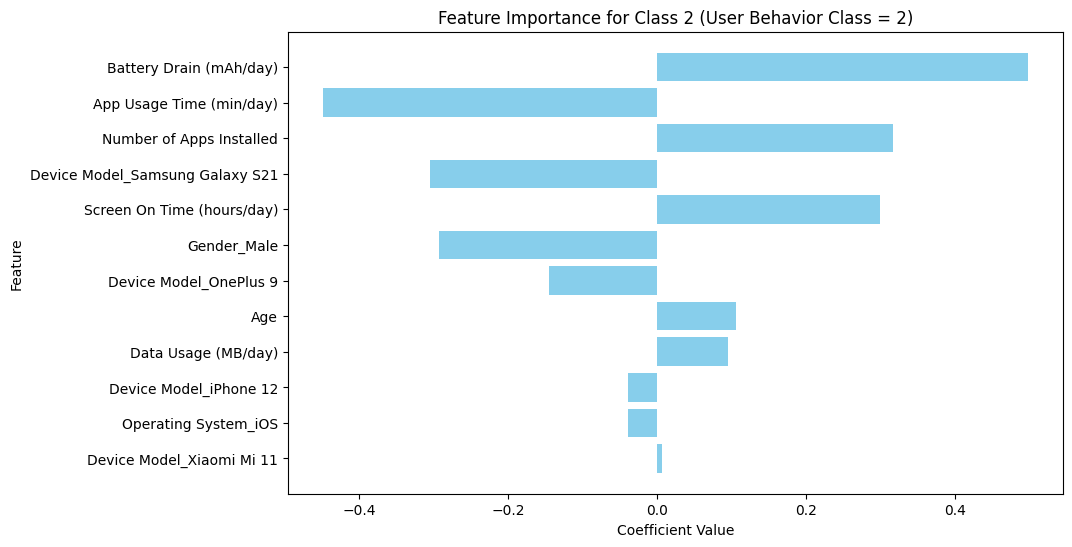

In [347]:
# Ambil koefisien untuk kelas 2
coefficients_class_2 = softmax_coefficients[2]

# Buat DataFrame untuk memetakan fitur dan koefisien
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": coefficients_class_2
})

# Tambahkan kolom absolut nilai untuk mempermudah pengurutan
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()

# Urutkan fitur berdasarkan pengaruh terbesar
feature_importance_sorted = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

# Tampilkan hasil
print("\n--- Fitur yang Berpengaruh ke Kelas 2 ---")
print(feature_importance_sorted)

# Visualisasi fitur yang berpengaruh
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_sorted["Feature"], feature_importance_sorted["Coefficient"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance for Class 2 (User Behavior Class = 2)")
plt.gca().invert_yaxis()  # Membalikkan sumbu Y agar fitur terpenting ada di atas
plt.show()


**Penjelasan** :
### **Hasil dan Interpretasi Visualisasi Fitur yang Berpengaruh ke Kelas 2**

#### **1. Hasil Visualisasi**
- **Sumbu Y**: Daftar fitur dalam dataset yang diurutkan berdasarkan nilai absolut koefisien.
- **Sumbu X**: Nilai koefisien yang merepresentasikan pengaruh fitur terhadap kemungkinan data masuk ke kelas 2:
  - **Koefisien Positif**: Fitur meningkatkan kemungkinan prediksi menjadi kelas 2.
  - **Koefisien Negatif**: Fitur mengurangi kemungkinan prediksi menjadi kelas 2.
- Fitur dengan nilai absolut terbesar memiliki dampak paling signifikan terhadap prediksi.

#### **2. Interpretasi Hasil**
1. **Fitur yang Paling Berpengaruh Positif**:
   - Fitur-fitur ini memiliki nilai koefisien positif besar.
   - Contoh: Jika fitur `App Usage Time (min/day)` memiliki koefisien positif tinggi, maka semakin besar nilai fitur ini, semakin tinggi kemungkinan data diprediksi sebagai kelas 2.

2. **Fitur yang Paling Berpengaruh Negatif**:
   - Fitur-fitur ini memiliki nilai koefisien negatif besar.
   - Contoh: Jika fitur `Screen On Time (hours/day)` memiliki koefisien negatif tinggi, maka semakin besar nilai fitur ini, semakin rendah kemungkinan data diprediksi sebagai kelas 2.

3. **Fitur Netral atau Kurang Signifikan**:
   - Fitur dengan nilai koefisien mendekati 0 memiliki pengaruh kecil atau netral terhadap prediksi kelas 2.

#### **3. Kesimpulan**
- **Fitur Utama**:
  - Fitur-fitur dengan nilai absolut koefisien tertinggi (baik positif maupun negatif) memiliki dampak terbesar.
- **Arah Hubungan**:
  - Koefisien positif → Mendukung prediksi kelas 2.
  - Koefisien negatif → Menentang prediksi kelas 2.



f). Jelaskan pengaruh **langsung** dilakukannya standarisasi pada model linear! Sertakan **sumber** anda!

**Penjelasan** :

### **Pengaruh Langsung Standarisasi pada Model Linear**

Standarisasi mengubah data numerik sehingga memiliki **mean = 0** dan **standard deviation = 1**. Proses ini memiliki pengaruh signifikan pada model linear seperti **Logistic Regression** (termasuk Softmax Regression).

#### **1. Mengapa Standarisasi Penting pada Model Linear**
- Logistic Regression (termasuk Softmax) menggunakan **gradien descent** untuk mengoptimalkan fungsi log-likelihood.
- Fitur dengan skala berbeda menyebabkan gradien menjadi tidak seimbang:
  - **Fitur dengan skala besar**: Mendominasi proses pembelajaran.
  - **Fitur dengan skala kecil**: Memberikan kontribusi yang tidak proporsional.

#### **2. Pengaruh Langsung pada Model**
1. **Stabilitas Optimasi**:
   - Standarisasi membuat gradien lebih seimbang, sehingga optimasi lebih stabil dan cepat konvergen.
   - Tanpa standarisasi, solver seperti `lbfgs` atau `saga` mungkin gagal konvergen dalam iterasi maksimum yang ditentukan.

2. **Interpretasi Koefisien**:
   - Standarisasi memungkinkan koefisien model (beta) diinterpretasikan secara seragam karena fitur memiliki skala yang sama.
   - Koefisien menunjukkan kontribusi relatif fitur terhadap prediksi.

3. **Regularisasi Lebih Efektif**:
   - Logistic Regression sering menggunakan regularisasi L1 atau L2.
   - Regularisasi lebih efektif jika fitur distandarisasi karena penalti (seperti pada L2) diterapkan secara konsisten di seluruh fitur.

4. **Metrik Evaluasi Lebih Akurat**:
   - Standarisasi meningkatkan performa model dengan memastikan semua fitur memiliki kontribusi yang optimal, sehingga metrik seperti **accuracy**, **F1-score**, atau **AUC** lebih representatif.

#### **3. Kapan Standarisasi Tidak Perlu?**
- Model linear tanpa regularisasi pada dataset dengan fitur yang sudah memiliki skala seragam.
- Contoh: Dataset dengan semua fitur bernilai antara 0-1 atau 0-100.

#### **4. Sumber Referensi**
1. **Scikit-learn Documentation**:
   - ["Importance of Feature Scaling"](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
   - Menunjukkan dampak standarisasi pada Logistic Regression.
   
2. **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (Aurélien Géron)**:
   - Bab 4: Importance of Scaling Features in Gradient-Based Models.
   
3. **Research Article**: "Impact of Standardization on Model Performance in Machine Learning" (Springer).

#### **Kesimpulan**
- **Standarisasi Wajib**: Jika fitur memiliki skala berbeda, khususnya untuk model linear seperti Logistic Regression.
- **Manfaat Utama**:
  - Optimasi stabil dan cepat.
  - Regularisasi lebih efektif.
  - Interpretasi koefisien lebih seragam.
  - Performansi model meningkat secara signifikan.


## Kompetisi Kaggle Regresi Berdasarkan Linear Models

Dalam rangka menerapkan pemahaman kalian pada materi model linear untuk kasus regresi, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 6 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi. Anda dapat mengunduh dataset yang digunakan dari halaman kompetisi tersebut.
*   Kerjakan solusi Anda menggunakan notebook ini. Anda dibebaskan untuk menambahkan cell code dan markdown sesuai kebutuhan.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.
*   Full score untuk score diatas benchmark

**Tautan Kaggle Competition**
*   [Kaggle Competition Linear Model for Regression](https://www.kaggle.com/t/b3ebe1bf9db2574bbc04efcd8f7318e5)

In [ ]:
# Reload the dataset with the newly uploaded file
file_path = 'players_rating_train.csv'
df = pd.read_csv(file_path)

# --- ANALISIS MENYELURUH UNTUK DUPLIKASI, OUTLIERS, DAN MISSING VALUES ---

# 1. Analisis Missing Values
print("\n--- ANALISIS MISSING VALUES ---")
missing_values = df.isnull().sum()
print("Jumlah Missing Values di Setiap Kolom:")
print(missing_values)

# Penanganan Missing Values
# Kolom numerik diisi dengan median, kolom kategorikal diisi dengan modus
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nJumlah Missing Values Setelah Penanganan:")
print(df.isnull().sum())

# Penanganan Outliers menggunakan IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# 3. Analisis Duplikasi
print("\n--- ANALISIS DUPLIKASI ---")
duplicate_rows = df.duplicated().sum()
print(f"Jumlah Baris Duplikat: {duplicate_rows}")
print(f"Proporsi Duplikasi: {duplicate_rows / df.shape[0]:.2%}")

if duplicate_rows > 0:
    print("\nContoh Baris Duplikat:")
    print(df[df.duplicated()].head())


# Penanganan Duplikasi
df_cleaned = df.drop_duplicates().copy()

print("\nDataset Setelah Penanganan Duplikasi:")
print(f"Shape Dataset Awal: {df.shape}")
print(f"Shape Dataset Setelah Menghapus Duplikasi: {df_cleaned.shape}")

# Reset index setelah cleaning
df_cleaned.reset_index(drop=True, inplace=True)
print("\nProses Cleaning Selesai!")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# === Split Dataset ===
# Target (y) adalah kolom rating, fitur lain menjadi X
X = df_cleaned.drop(columns=['rating'])
y = df_cleaned['rating']

# Pisahkan dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Validasi Split Dataset
print(f"Shape X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}, y_test: {y_test.shape}")

# === Identifikasi Kolom Numerik dan Kategorikal ===
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Validasi Identifikasi Kolom
print(f"Numerical Columns: {list(numerical_cols)}")
print(f"Categorical Columns: {list(categorical_cols)}")

# === Setup Preprocessor ===
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),          # Standardisasi untuk fitur numerik
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-Hot Encoding untuk fitur kategorikal
    ]
)

# === Transformasi Data Train dan Test ===
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Mendapatkan nama-nama kolom hasil transformasi
encoded_feature_names = list(numerical_cols) + \
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Konversi hasil transformasi ke DataFrame untuk Train dan Test
X_train_encoded = pd.DataFrame(X_train_transformed, columns=encoded_feature_names)
X_test_encoded = pd.DataFrame(X_test_transformed, columns=encoded_feature_names)

# === Output untuk Validasi ===
print("\n📊 Statistik Deskriptif Data Train:")
print(X_train_encoded.describe())

print("\n📊 Statistik Deskriptif Data Test:")
print(X_test_encoded.describe())

# Validasi bahwa target tidak dimodifikasi
print("\n🔍 Validasi Target Variable:")
print(f"Train Target Sample:\n{y_train.head()}")
print(f"Test Target Sample:\n{y_test.head()}")

# Validasi bahwa tidak ada missing value di data hasil transformasi
print("\n🔍 Missing Value Check:")
print(f"Train Missing Values: {X_train_encoded.isnull().sum().sum()}")
print(f"Test Missing Values: {X_test_encoded.isnull().sum().sum()}")


import pandas as pd
from sklearn.model_selection import RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ========================
# Step 1: Load Dataset
# ========================
file_path_train = 'players_rating_train.csv'
file_path_test = 'players_rating_test.csv'

df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

print(f"Train Dataset Columns: {df_train.columns}")
print(f"Test Dataset Columns: {df_test.columns}")

# ========================
# Step 2: Define Columns and Preprocessing Pipeline
# ========================
numerical_cols = df_train.select_dtypes(include=['float64', 'int64']).drop(columns=['rating']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()

# Validate columns
print(f"Numerical Columns: {numerical_cols}")
print(f"Categorical Columns: {categorical_cols}")

# Preprocessing for numerical and categorical features
numerical_preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

# ========================
# Step 3: Feature Selection Using RandomForest
# ========================
X_train_raw = df_train.drop(columns=['rating'])
y_train = df_train['rating']

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(X_train_raw[categorical_cols])

# Combine numerical and encoded categorical features
numerical_data = X_train_raw[numerical_cols].to_numpy()
X_train_preprocessed = np.hstack((numerical_data, categorical_encoded))

# Validate combined data
print(f"Shape of Preprocessed X_train: {X_train_preprocessed.shape}")

# Use RandomForest to select important features
rf_selector = RandomForestRegressor(random_state=42)
rf_selector.fit(X_train_preprocessed, y_train)

# Extract important features
categorical_feature_names = encoder.get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(categorical_feature_names)
important_features = pd.Series(rf_selector.feature_importances_, index=all_feature_names)
selected_features = important_features[important_features > 0.01].index.tolist()

print(f"Selected Features: {selected_features}")

# ========================
# Step 4: ElasticNet Model Pipeline
# ========================
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), selected_features)
        ]
    )),
    ('model', ElasticNet(max_iter=1000, random_state=42))
])

# ========================
# Step 5: Hyperparameter Tuning
# ========================
param_grid = {
    'model__alpha': [0.1, 0.5, 1.0, 10.0, 50.0, 100.0],
    'model__l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='r2', n_jobs=-1, error_score='raise')
grid_search.fit(X_train_raw[selected_features], y_train)

best_model = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")

# ========================
# Step 6: Evaluate Model
# ========================
# Cross-Validation Scores
cv_scores = cross_val_score(best_model, X_train_raw[selected_features], y_train, cv=cv, scoring='r2')
print(f"\nCross-Validation R2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cv_scores):.4f}")

# Evaluate on Train Data
y_train_pred = best_model.predict(X_train_raw[selected_features])
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print("\nTrain Evaluation:")
print(f"Train RMSE: {train_rmse:.4f}, Train R2: {train_r2:.4f}")

# Residual Analysis
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

# ========================
# Step 7: Predict on Test Data
# ========================
X_test_selected = df_test[selected_features]
y_test_pred = best_model.predict(X_test_selected)
df_test['Predicted_Rating'] = y_test_pred

output_file_path = 'optimized_elastic_net_with_rf_predictions.csv'
df_test[['ID', 'Predicted_Rating']].to_csv(output_file_path, index=False)

print(f"\nPredictions saved to {output_file_path}")





--- ANALISIS MISSING VALUES ---
Jumlah Missing Values di Setiap Kolom:
ID                  0
pos_role            0
goals               0
assists             0
shots_ontarget      0
shots_offtarget     0
shotsblocked        0
chances2score       0
drib_success        0
drib_unsuccess      0
keypasses           0
touches             0
passes_acc          0
passes_inacc        0
crosses_acc         0
crosses_inacc       0
lballs_acc          0
lballs_inacc        0
poss_lost           0
fouls               0
wasfouled           0
tballs_acc          0
tballs_inacc        0
offsides            0
missed_penalties    0
owngoals            0
win                 0
minutesPlayed       0
rating              0
dtype: int64

Jumlah Missing Values Setelah Penanganan:
ID                  0
pos_role            0
goals               0
assists             0
shots_ontarget      0
shots_offtarget     0
shotsblocked        0
chances2score       0
drib_success        0
drib_unsuccess      0
keypasses     

In [375]:
pip install scipy.stats

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scipy.stats (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for scipy.stats


In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import zscore

# ========================
# Step 1: Load Dataset
# ========================
train_data = pd.read_csv('players_rating_train.csv')
test_data = pd.read_csv('players_rating_test.csv')

# ========================
# Step 2: Eksplorasi Data (EDA)
# ========================
numerical_cols = train_data.select_dtypes(include=np.number).columns
categorical_cols = train_data.select_dtypes(include='object').columns

# Update numerical_cols to exclude 'rating'
numerical_cols = numerical_cols.drop('rating', errors='ignore')

# Handle missing values in numerical and categorical columns
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].median())
test_data[numerical_cols] = test_data[numerical_cols].fillna(train_data[numerical_cols].median())
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])
test_data[categorical_cols] = test_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])

# ========================
# Step 3: Outlier Detection
# ========================
z_scores = np.abs(zscore(train_data[numerical_cols]))
train_data = train_data[(z_scores < 3).all(axis=1)]

# ========================
# Step 4: Encoding Kategorikal
# ========================
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
train_encoded = pd.DataFrame(encoder.fit_transform(train_data[categorical_cols]))
test_encoded = pd.DataFrame(encoder.transform(test_data[categorical_cols]))
train_encoded.columns = encoder.get_feature_names_out(categorical_cols)
test_encoded.columns = encoder.get_feature_names_out(categorical_cols)
train_data = pd.concat([train_data.drop(categorical_cols, axis=1), train_encoded], axis=1)
test_data = pd.concat([test_data.drop(categorical_cols, axis=1), test_encoded], axis=1)

# ========================
# Step 5: Konsistensi Kolom
# ========================
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

# ========================
# Step 6: Feature Engineering
# ========================
# Separate features and target
X = train_data.drop(['rating', 'ID'], axis=1)
y = train_data['rating']

# Handle NaN in target variable y
if y.isnull().any():
    print("NaN detected in target variable y. Applying backup imputation.")
    y = y.fillna(y.median())

# Ensure 'rating' is not included in test_features
test_features = test_data.drop(columns=['rating', 'ID'], errors='ignore')

# Align test_features with X columns
test_features = test_features.reindex(columns=X.columns, fill_value=0)

# Ensure no NaN in features before modeling
X = X.fillna(0)
test_features = test_features.fillna(0)

# ========================
# Step 7: Train-Test Split
# ========================
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure no NaN in y_train and y_val
if y_train.isnull().any():
    print("NaN detected in y_train. Applying backup imputation.")
    y_train = y_train.fillna(y_train.median())

if y_val.isnull().any():
    print("NaN detected in y_val. Applying backup imputation.")
    y_val = y_val.fillna(y_val.median())

# ========================
# Step 8: Hyperparameter Tuning
# ========================
param_grid = {
    'elasticnet__alpha': [0.01, 0.1, 1, 10],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9]
}
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(max_iter=10000, random_state=42))
])
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best ElasticNet model
best_elasticnet = grid_search.best_estimator_

# ========================
# Step 9: Evaluasi Model
# ========================
y_val_pred = best_elasticnet.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse}")
print(f"Validation MAE: {mae}")
print(f"Validation RMSE: {rmse}")
print(f"Validation R²: {r2}")

# ========================
# Step 10: Prediction on Test Data
# ========================
test_predictions = best_elasticnet.predict(test_features)

# ========================
# Step 11: Save Predictions
# ========================
output = pd.DataFrame({
    'ID': test_data['ID'],
    'rating': test_predictions
})
output_file_path = 'submission_scaled.csv'
output.to_csv(output_file_path, index=False)

print(f"Predictions saved to {output_file_path}")


NaN detected in target variable y. Applying backup imputation.
Validation MSE: 0.13338739115336964
Validation MAE: 0.26972737510702083
Validation RMSE: 0.365222385887516
Validation R²: 0.6224935124127774
Predictions saved to submission_scaled.csv
